## Importing necessary libraries

In [145]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

# This will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

## Loading the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pd.read_csv("/content/drive/MyDrive/Data Science/Capstone Project/Data.csv")

meta_data = pd.read_csv("/content/drive/MyDrive/Data Science/Capstone Project/Meta Data.csv")

## Data Overview

In [4]:
data.head(10)

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.000,6.000,Debit Card,Female,3.000,3,Super,2.000,Single,9,1.000,11,1,5,160,Mobile
1,20001,1,0,1.000,8.000,UPI,Male,3.000,4,Regular Plus,3.000,Single,7,1.000,15,0,0,121,Mobile
2,20002,1,0,1.000,30.000,Debit Card,Male,2.000,4,Regular Plus,3.000,Single,6,1.000,14,0,3,NaN,Mobile
3,20003,1,0,3.000,15.000,Debit Card,Male,2.000,4,Super,5.000,Single,8,0.000,23,0,3,134,Mobile
4,20004,1,0,1.000,12.000,Credit Card,Male,2.000,3,Regular Plus,5.000,Single,3,0.000,11,1,3,130,Mobile
5,20005,1,0,1.000,22.000,Debit Card,Female,3.000,NaN,Regular Plus,5.000,Single,2,1.000,22,4,7,139,Computer
6,20006,1,2,3.000,11.000,Cash on Delivery,Male,2.000,3,Super,2.000,Divorced,4,0.000,14,0,0,121,Mobile
7,20007,1,0,1.000,6.000,Credit Card,Male,3.000,3,Regular Plus,2.000,Divorced,3,1.000,16,2,0,123,Mobile
8,20008,1,13,3.000,9.000,E wallet,Male,2.000,4,Regular Plus,3.000,Divorced,2,1.000,14,0,2,127,Mobile
9,20009,1,0,1.000,31.000,Debit Card,Male,2.000,5,Regular Plus,3.000,Single,2,0.000,12,1,1,123,Mobile


Notes
- Drop 'AccountID'
- Convert City_Tier to int
- Convert CC_Contacted_LY to int
- Convert Service_Score to int
- Some NaNs to fix
- Convert Agent_Score to int
- Convert Complain_ly to int

Questions
- Is Tenure in years or months?
- Not sure of City_Tier scale (1-5?). Is 1 high or low?
- Is Service_Score 1-5?
- Is Agent_Score 1-5?

In [5]:
meta_data.head(20)

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,NaN,Variable,Description
1,NaN,AccountID,account unique identifier
2,NaN,Churn,"account churn flag (Target), 1 - Churn, 0 - No..."
3,NaN,Tenure,Tenure of account in months
4,NaN,City_Tier,Tier of primary customer's city
5,NaN,CC_Contacted_L12m,How many times all the customers of the accoun...
6,NaN,Payment,Preferred Payment mode of the customers in the...
7,NaN,Gender,Gender of the primary customer of the account
8,NaN,Service_Score,Satisfaction score given by customers of the a...
9,NaN,Account_user_count,Number of customers tagged with this account


- Simply a list of variables and their corresponding meanings.

In [6]:
data.shape

(11260, 19)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

- Drop 'AccountID'
- Convert Tenure to int
- Convert City_Tier to int
- Convert CC_Contacted_LY to int
- Convert Service_Score to int
- Convert Account_user_count to int
- Convert CC_Agent_Score to int
- Convert rev_per_month to int
- Convert Complain_ly to int
- Convert rev_growth_yoy to int
- Convert coupon_used_for_payment to int
- Convert Day_Since_CC_connect to int
- Convert cashback to int

- ***Some missing values to impute


In [8]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
AccountID,11260.000,NaN,NaN,NaN,25629.500,3250.626,20000.000,22814.750,25629.500,28444.250,31259.000
Churn,11260.000,NaN,NaN,NaN,0.168,0.374,0.000,0.000,0.000,0.000,1.000
Tenure,11158,38,1,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City_Tier,11148.000,NaN,NaN,NaN,1.654,0.915,1.000,1.000,1.000,3.000,3.000
CC_Contacted_LY,11158.000,NaN,NaN,NaN,17.867,8.853,4.000,11.000,16.000,23.000,132.000
Payment,11151,5,Debit Card,4587,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,11152,4,Male,6328,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Service_Score,11162.000,NaN,NaN,NaN,2.903,0.726,0.000,2.000,3.000,3.000,5.000
Account_user_count,11148,7,4,4569,NaN,NaN,NaN,NaN,NaN,NaN,NaN
account_segment,11163,7,Super,4062,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- CC_Contacted_LY has high max. Might be outlier that needs to be treated.
- Gender has 4 unique inputs. Check this out.
- Most frequent Account_user_count is 4.
- Most frequent account_segment is Super.
- Service_Score and CC_Agent_Score do appear to be scored out of 5.
- Most frequent Marital_Status is Married.
- Most frequent coupon_used_for_payment is 1 coupon.
- Most frequent Login_device is Mobile.

In [9]:
data.duplicated().sum()

0

In [10]:
round(data.isnull().sum() / data.isnull().count() * 100, 2)

AccountID                 0.000
Churn                     0.000
Tenure                    0.910
City_Tier                 0.990
CC_Contacted_LY           0.910
Payment                   0.970
Gender                    0.960
Service_Score             0.870
Account_user_count        0.990
account_segment           0.860
CC_Agent_Score            1.030
Marital_Status            1.880
rev_per_month             0.910
Complain_ly               3.170
rev_growth_yoy            0.000
coupon_used_for_payment   0.000
Day_Since_CC_connect      3.170
cashback                  4.180
Login_device              1.960
dtype: float64

### EDA

## Univariate Analysis

In [11]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [12]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [13]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

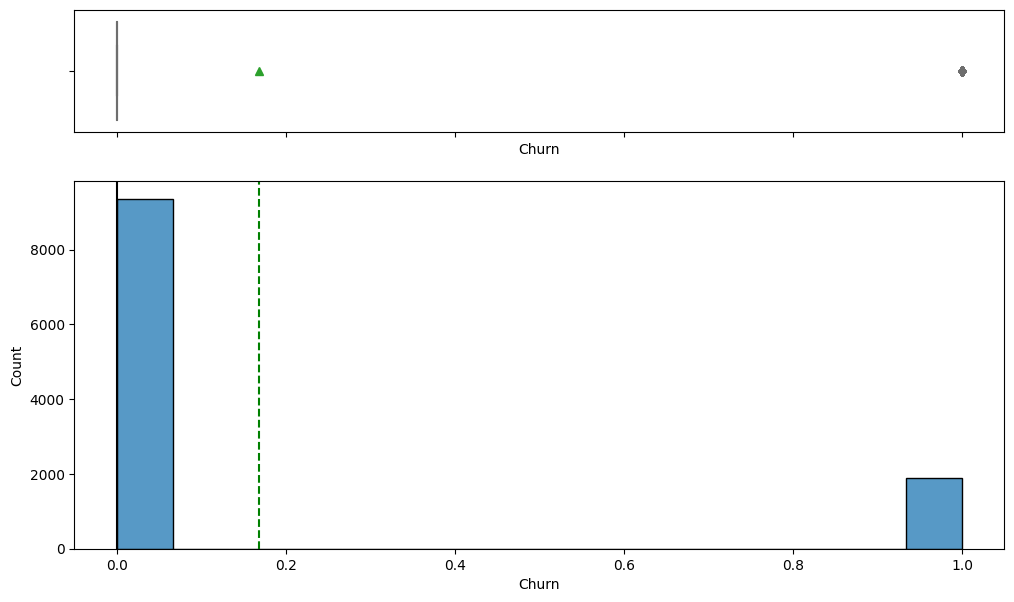

In [14]:
histogram_boxplot(data, "Churn")

- About 2000 churned
- The rest (about 9200) did not.

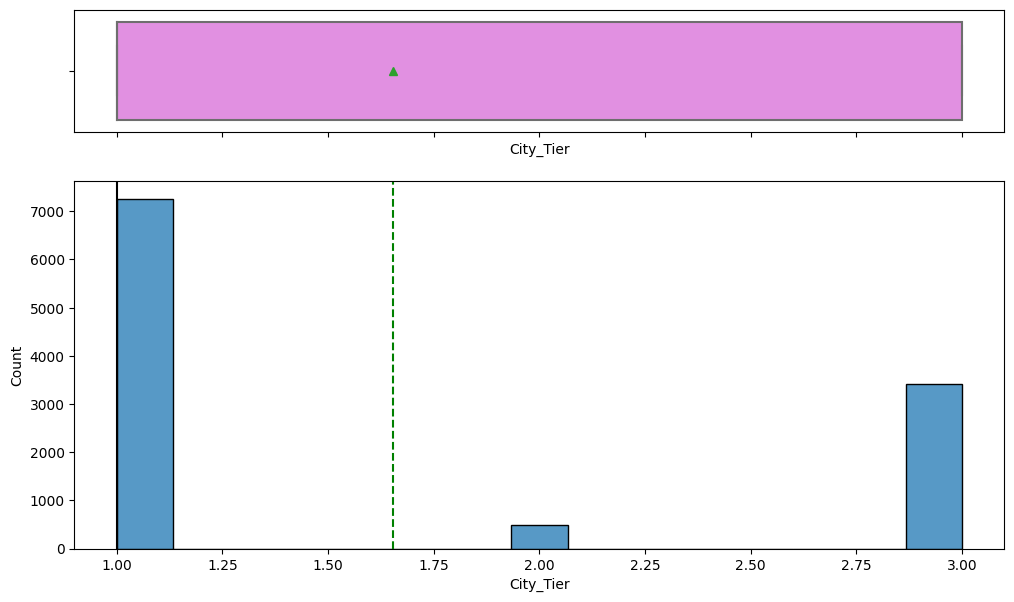

In [15]:
histogram_boxplot(data, "City_Tier")

- Not many Tier 2 cities (under 1000)
- Mostly Tier 1 cities (a little above 7000)
- About 3500 Tier 3 cities.

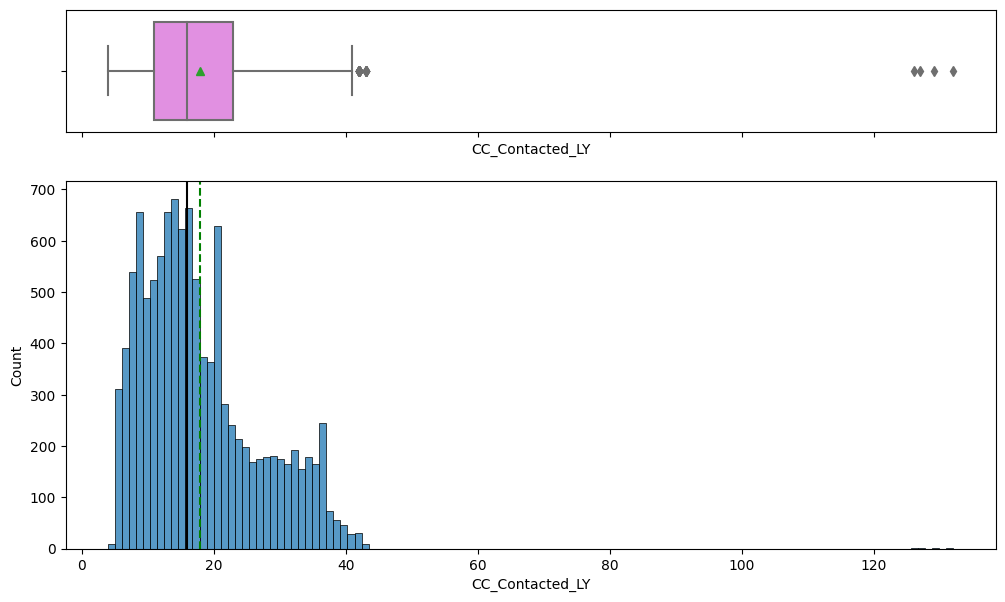

In [16]:
histogram_boxplot(data, "CC_Contacted_LY")

- Right-skewed
- A few outliers above 120. These may need to be treated.
- Mostly between 10-22

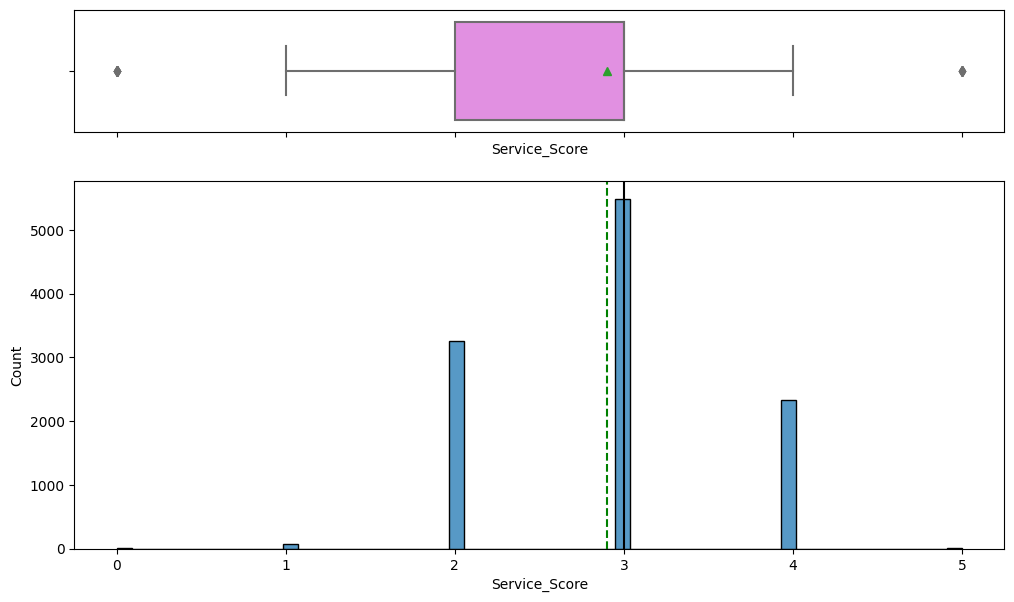

In [17]:
histogram_boxplot(data, "Service_Score")

- A few outliers at 0 and 5, but probably don't need to treat these.
- Most frequent response is 3.

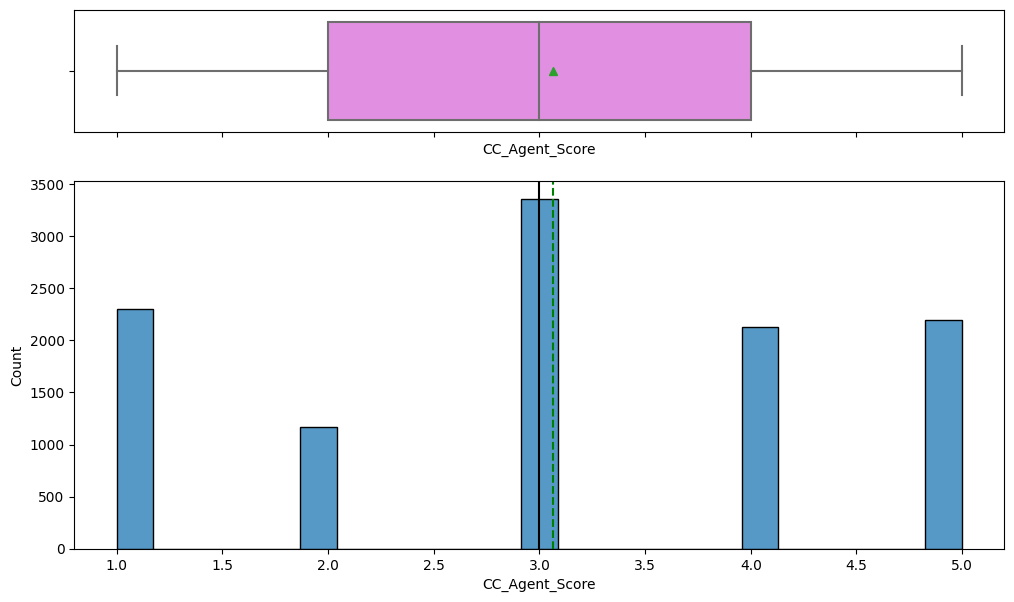

In [18]:
histogram_boxplot(data, "CC_Agent_Score")

- Most frequent response is 3.

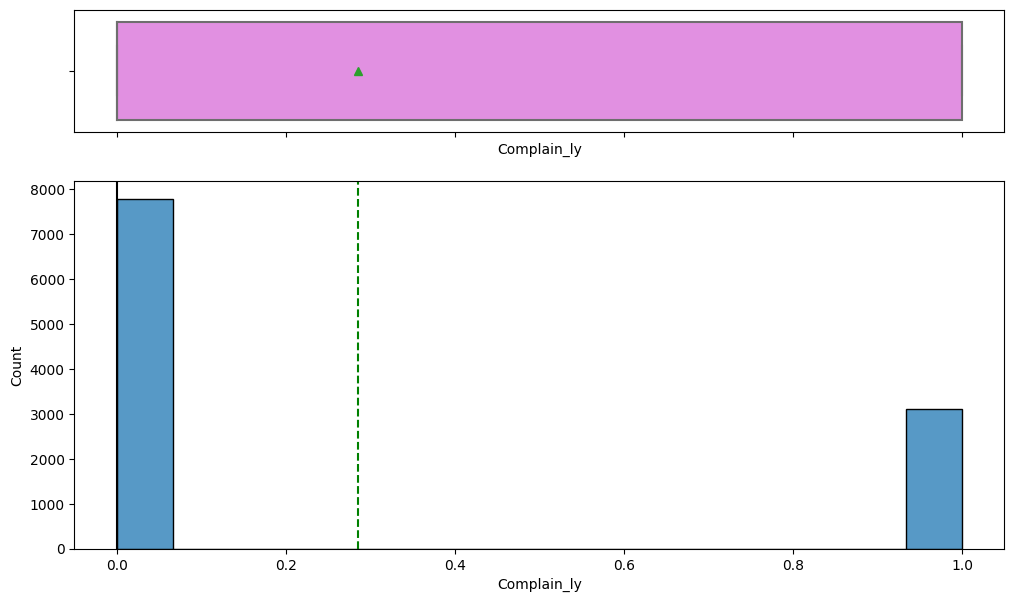

In [19]:
histogram_boxplot(data, "Complain_ly")

- Most accounts did NOT complain (about 7800).
- About 3300 accounts complained.

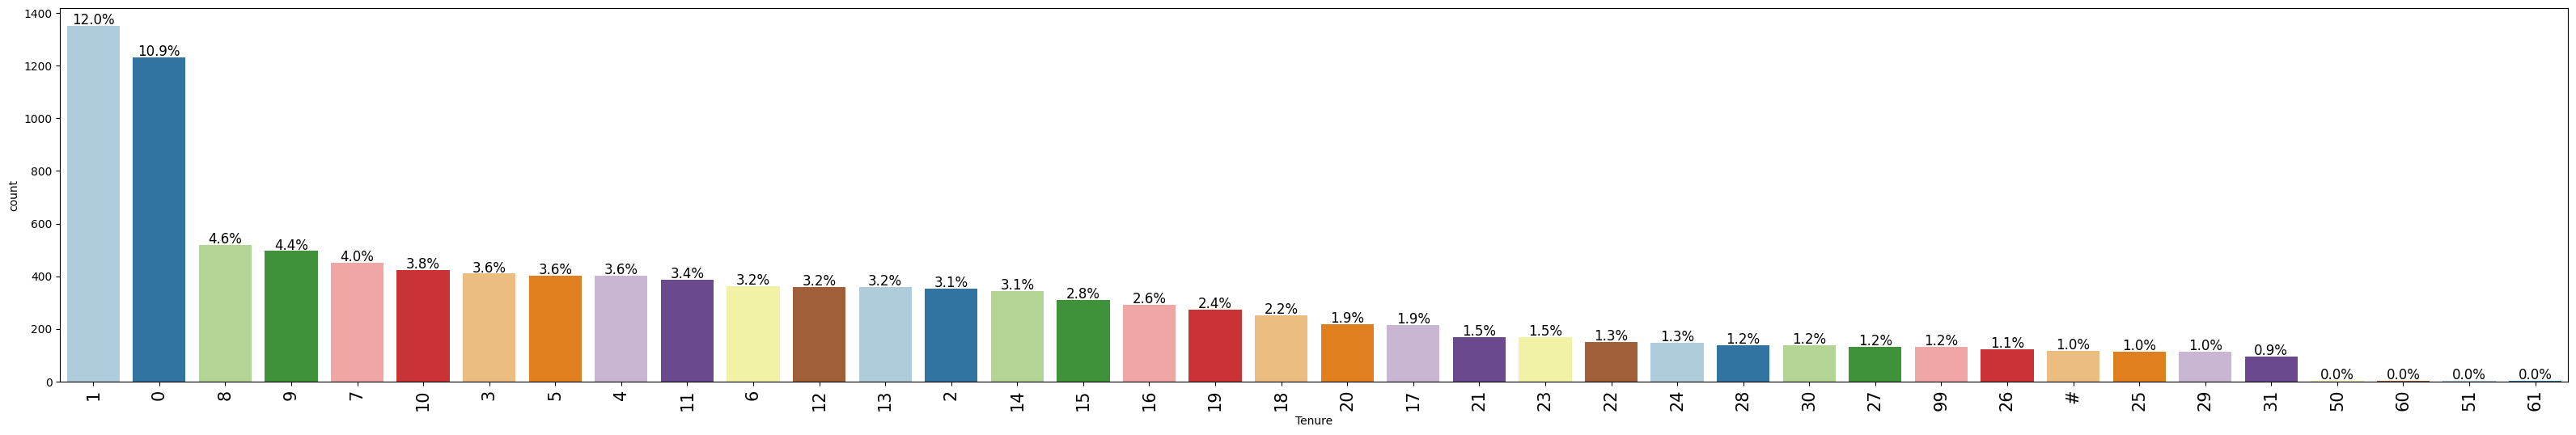

In [20]:
labeled_barplot(data, "Tenure", perc=True)

- Most accounts have only 0 or 1 Tenure (months or years?)

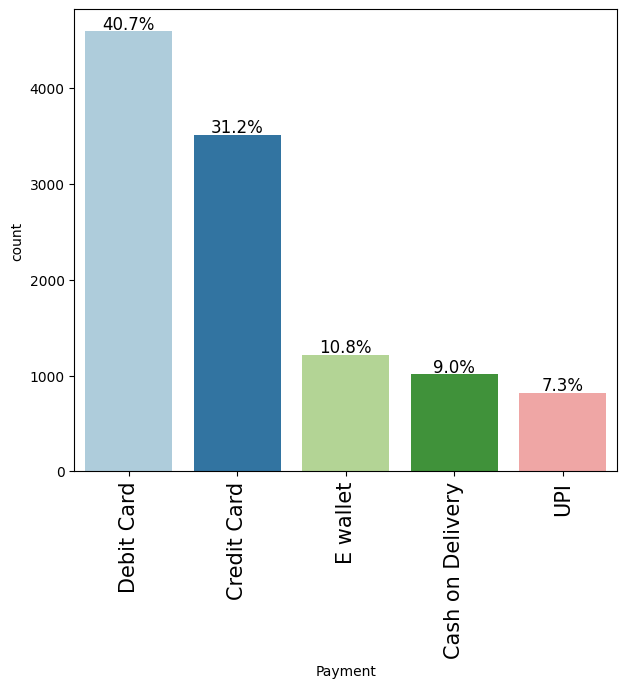

In [21]:
labeled_barplot(data, "Payment", perc=True)

- About 40% of accounts paid by Debit Card
- About 31% of accounts paid by Credit Card
- The remaining accounts paid either by E-wallet (11%), Cash on Delivery (9%), or UPI (7%)

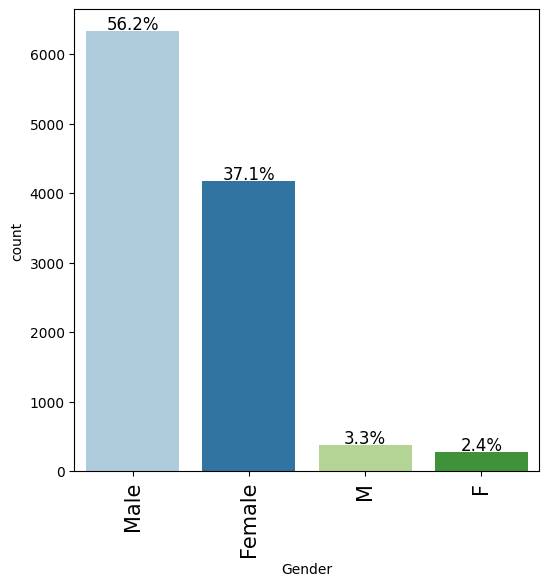

In [22]:
labeled_barplot(data, "Gender", perc=True)

- Male 60%, Female 40%
- M and F will need to be changed.

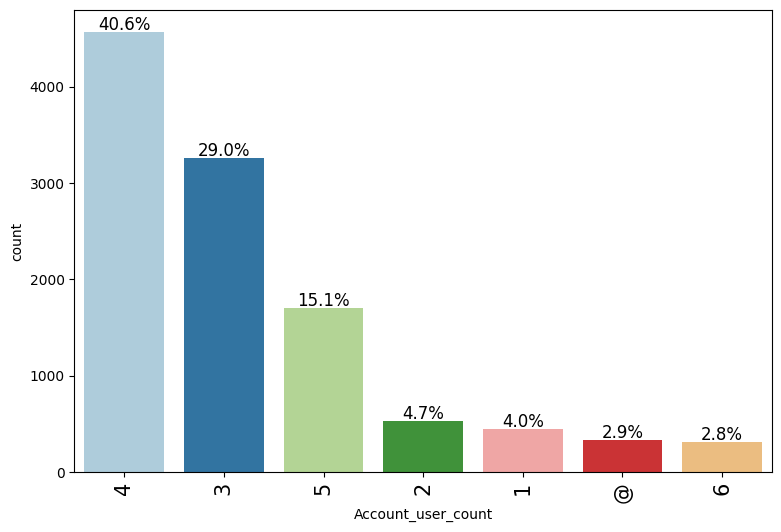

In [23]:
labeled_barplot(data, "Account_user_count", perc=True)

- The most frequent number of users on an account is 4 (41%)
- 3 - 29%
- 5 - 15%
- Followed by 2, 1, 6 all under 5% each.
- '@' will need to be changed

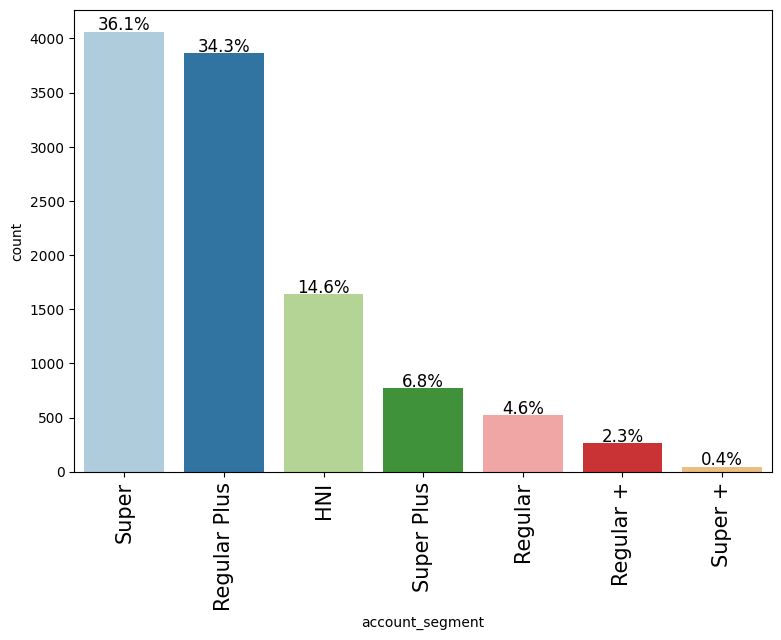

In [24]:
labeled_barplot(data, "account_segment", perc=True)

- 'Super' (36%) and 'Regular Plus' (34%) are the most popular.
- HNI (15%) is 3rd most popular
- Followed by 'Super Plus' (7%) and 'Regular' (7%).
- 'Regular +' and 'Super +' will need to be changed.

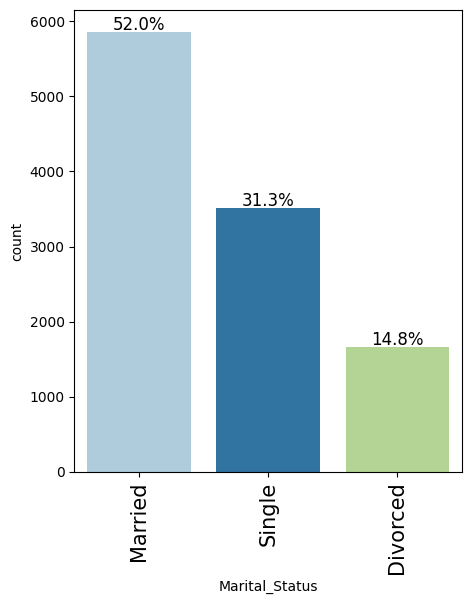

In [25]:
labeled_barplot(data, "Marital_Status", perc=True)

- Most users are Married (52%)
- Followed by Single (31%)
- Divorced (15%)
- Does 'Divorced' get folded into 'Single'?

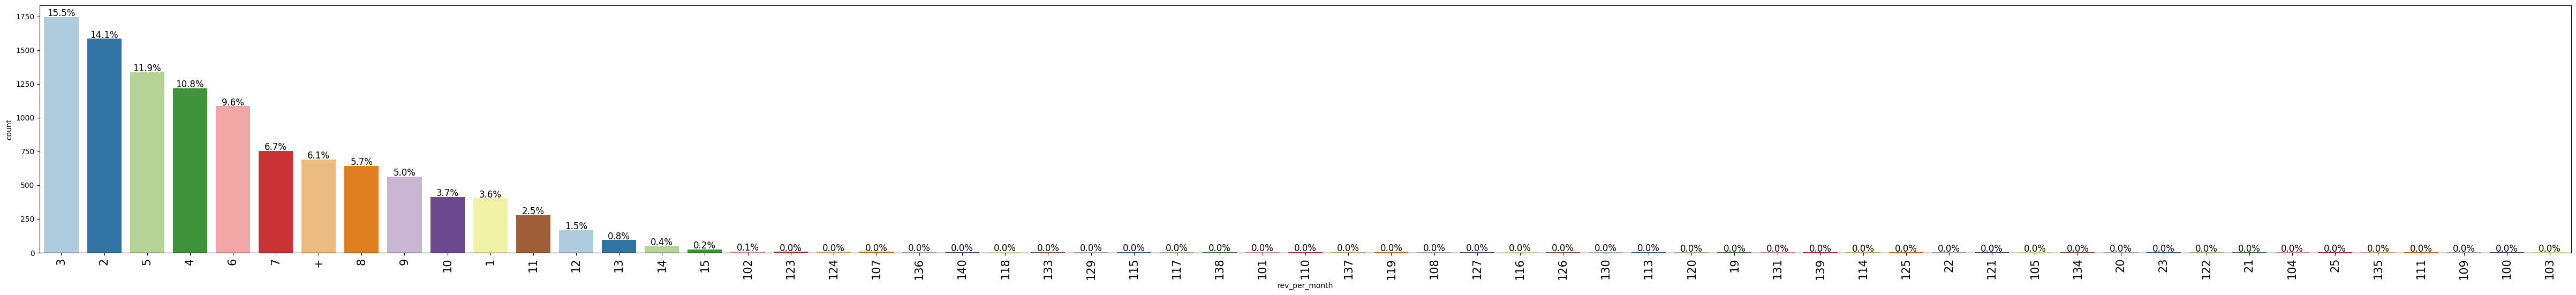

In [26]:
labeled_barplot(data, "rev_per_month", perc=True)

- Mostly 2-6
- Many outliers to be possibly treated.
- Must fix the '+'

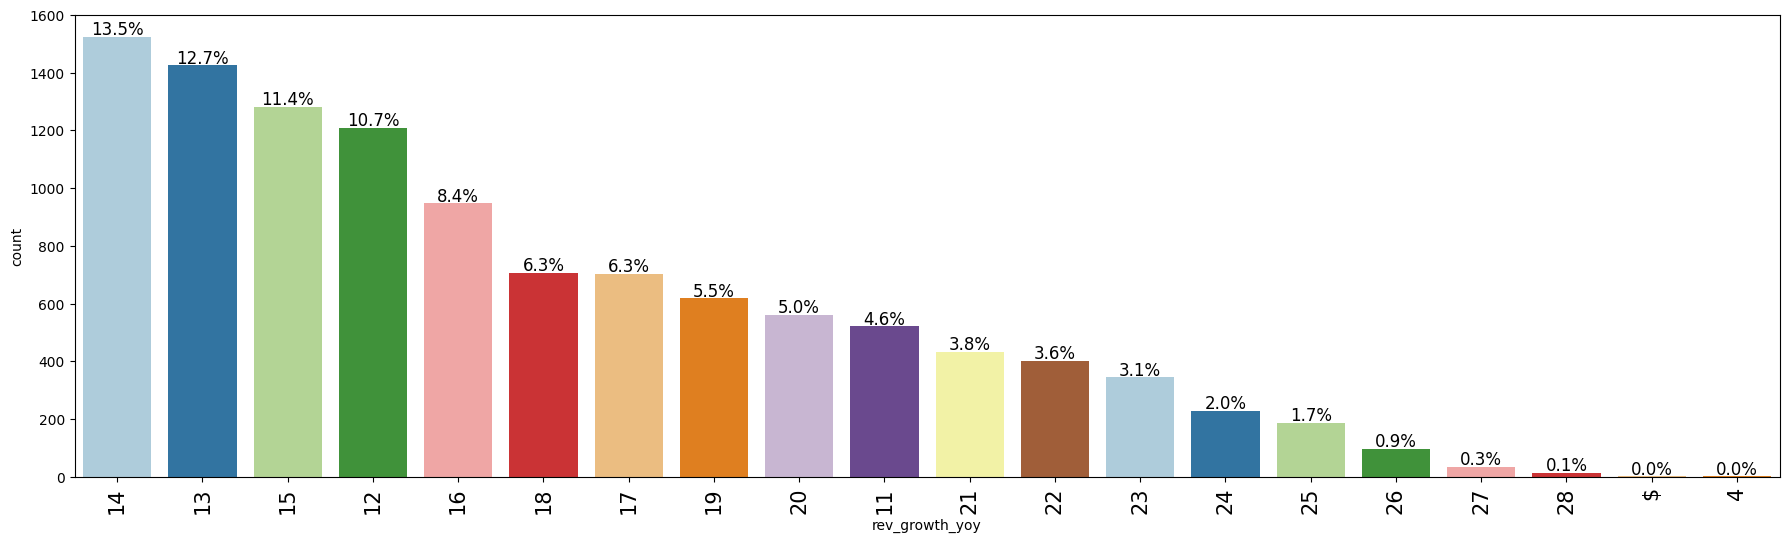

In [27]:
labeled_barplot(data, "rev_growth_yoy", perc=True)

- Mostly 12-15
- Must fix '$' (probably human error entry for '4')
- '4' is an outlier and might need to be treated

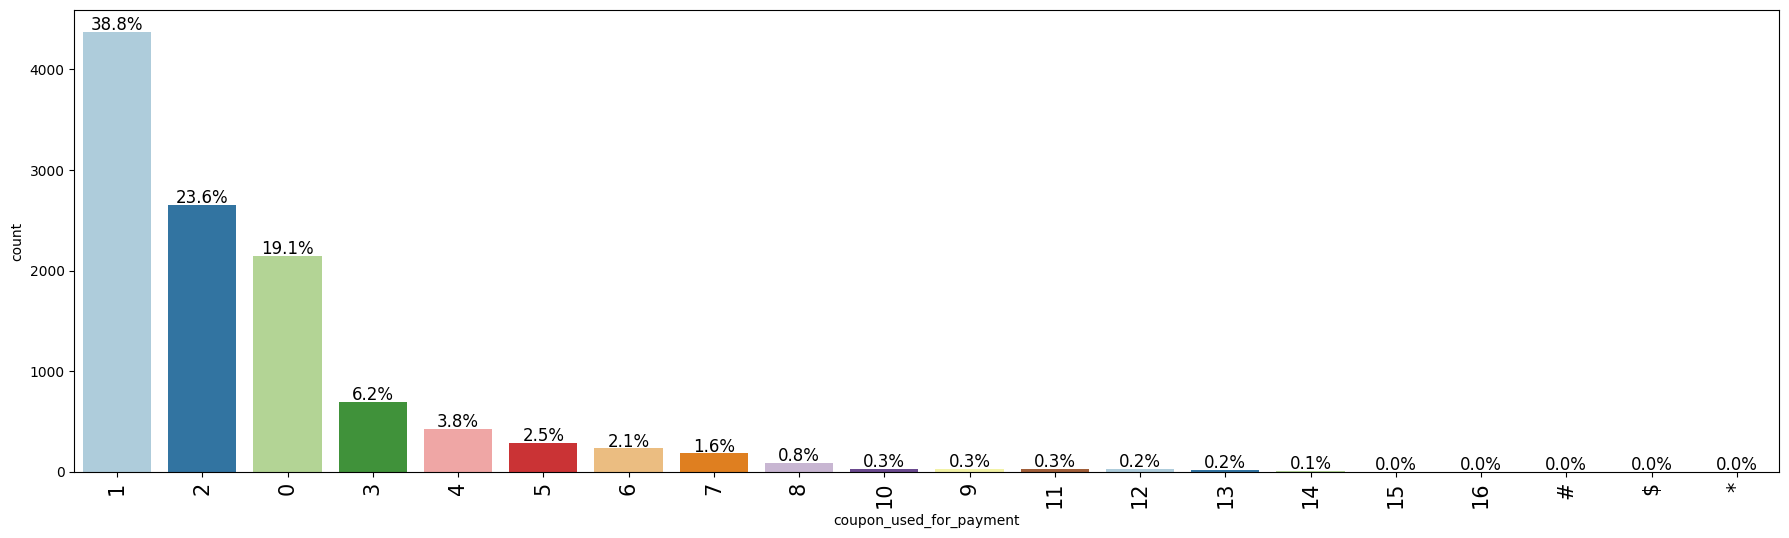

In [28]:
labeled_barplot(data, "coupon_used_for_payment", perc=True)

- Mostly 0-2
- Must treat '#', '$', and '*' (most likely human error meant for corresponding numbers on keyboard)

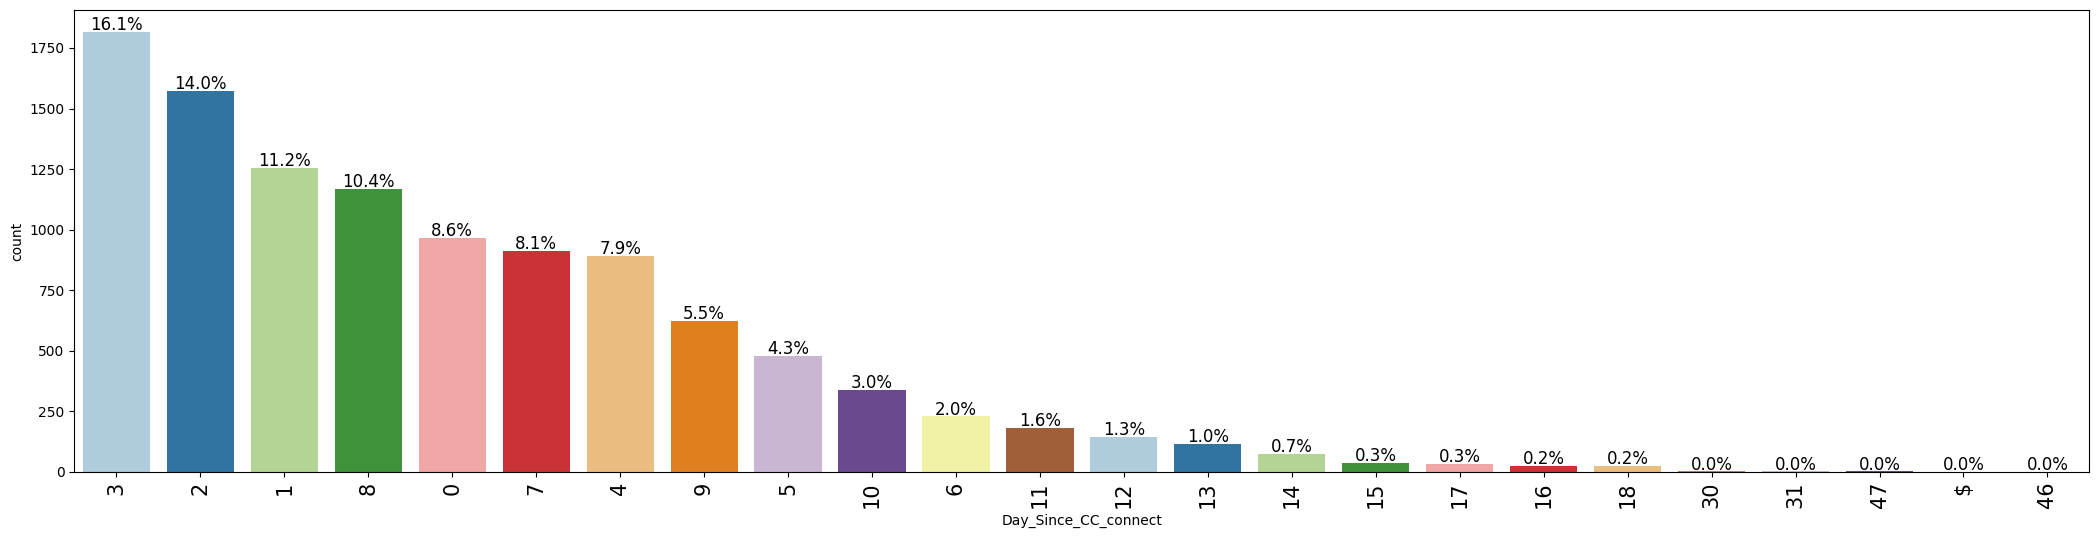

In [29]:
labeled_barplot(data, "Day_Since_CC_connect", perc=True)

- Some outliers that may need to be treated
- Must treat '$' (probably human error meant for '4')

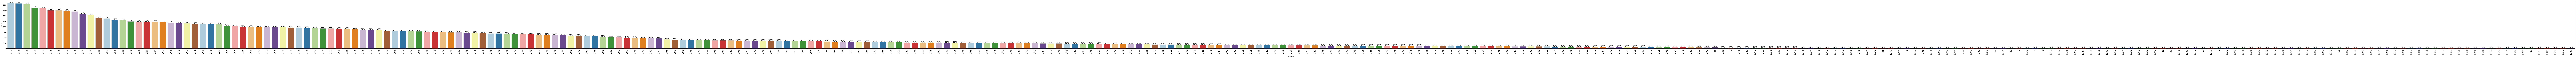

In [30]:
labeled_barplot(data, "cashback", perc=True)

- unable to read this. need to convert data type to 'int'

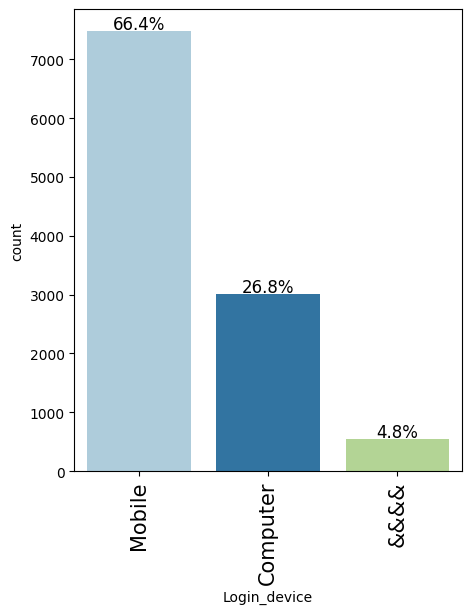

In [31]:
labeled_barplot(data, "Login_device", perc=True)

- Mostly Mobile (66%)
- About 27% Computer
- Must treat '&&&&' (ask the team what this is?)

## Bivariate Analysis

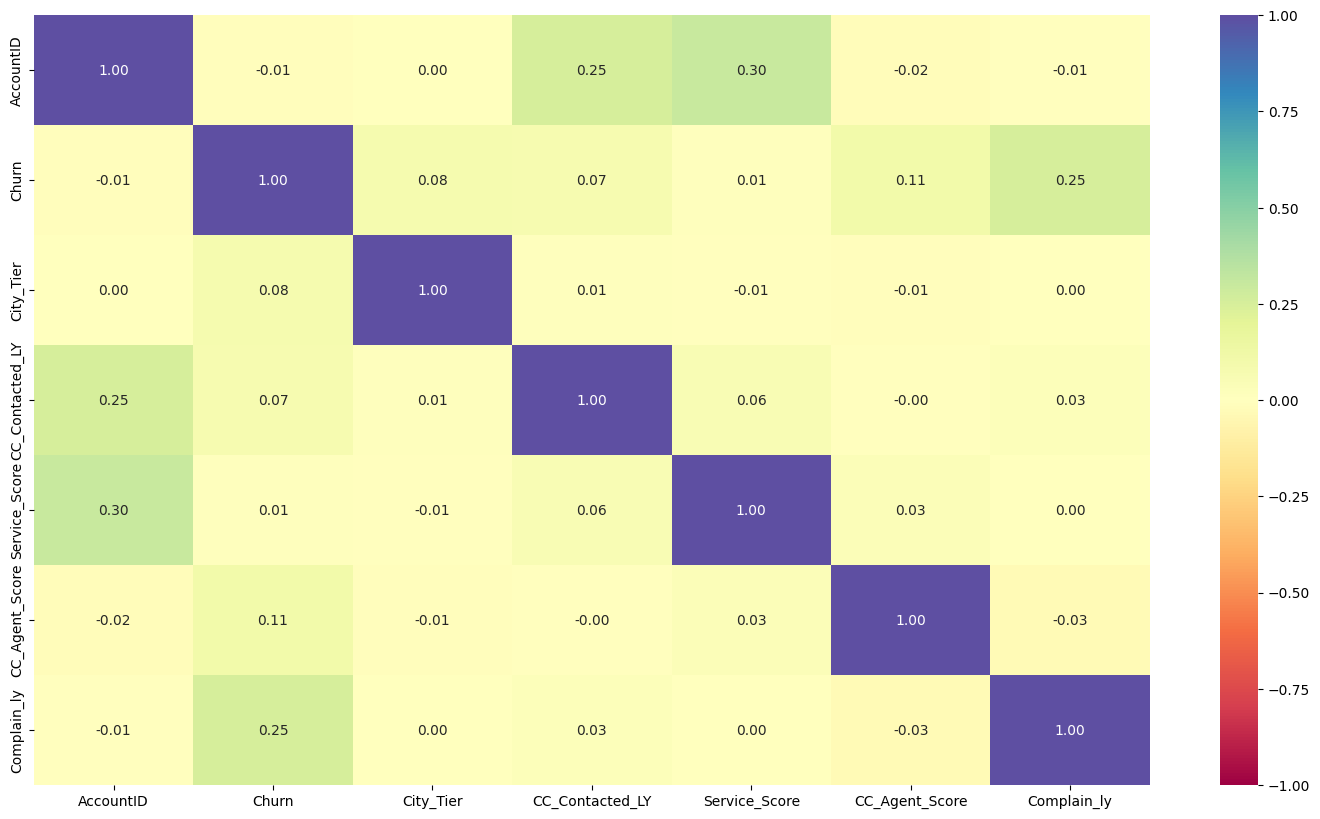

In [32]:
plt.figure(figsize=(18, 10))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- Little to no correlation between numeric variables

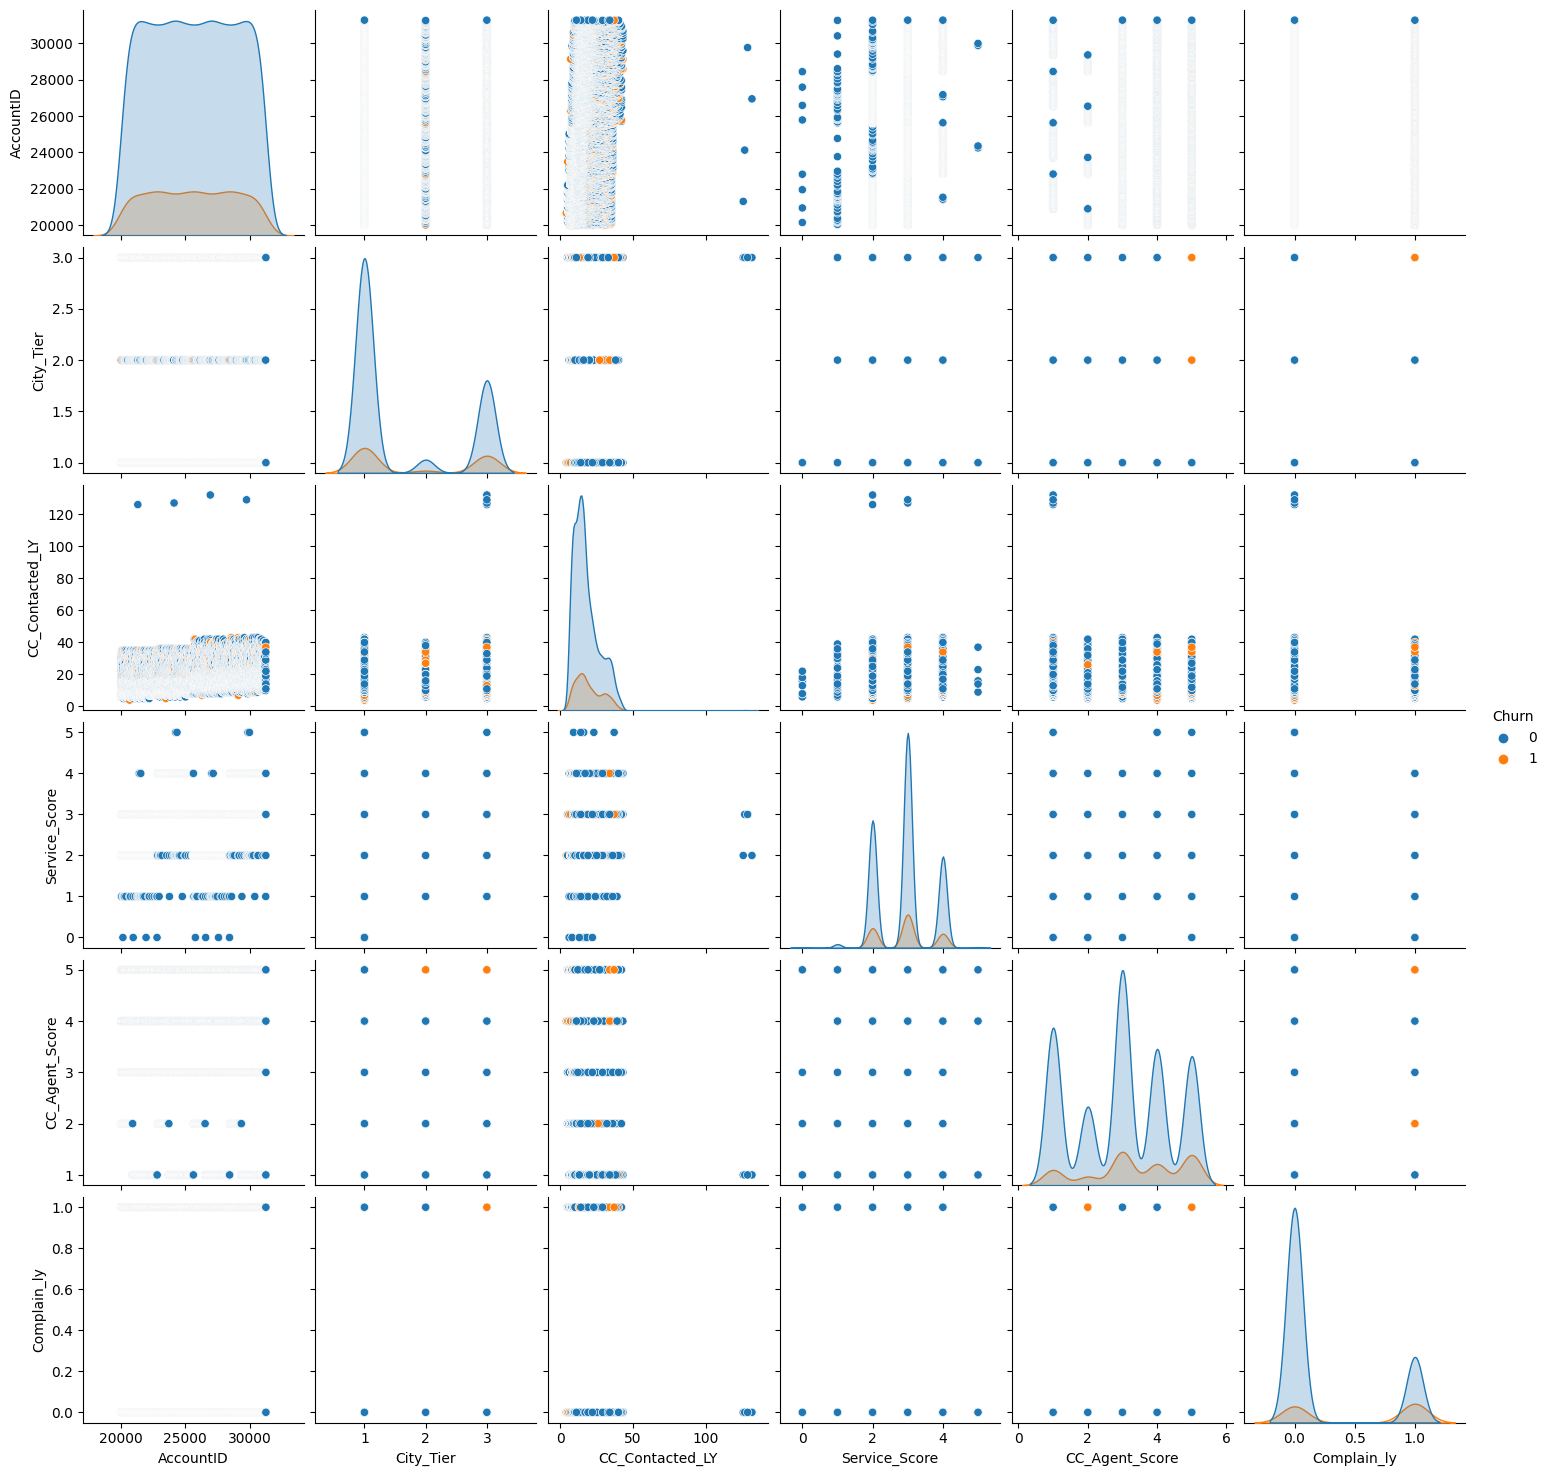

In [33]:
sns.pairplot(data, hue="Churn")

- Showing no correlation between numeric variables

Churn      0     1    All
Tenure                   
All     9285  1873  11158
1        681   670   1351
0        562   669   1231
4        360    43    403
3        367    43    410
2        322    32    354
7        418    32    450
5        373    30    403
20       187    30    217
8        490    29    519
10       396    27    423
#         91    25    116
13       334    25    359
14       320    25    345
99       107    24    131
19       249    24    273
9        475    21    496
21       150    20    170
11       368    20    388
15       291    20    311
16       272    19    291
6        348    15    363
12       347    13    360
18       242    11    253
17       209     6    215
50         2     0      2
61         2     0      2
60         2     0      2
51         2     0      2
30       137     0    137
31        96     0     96
29       114     0    114
28       137     0    137
27       131     0    131
26       122     0    122
24       147     0    147
23       169

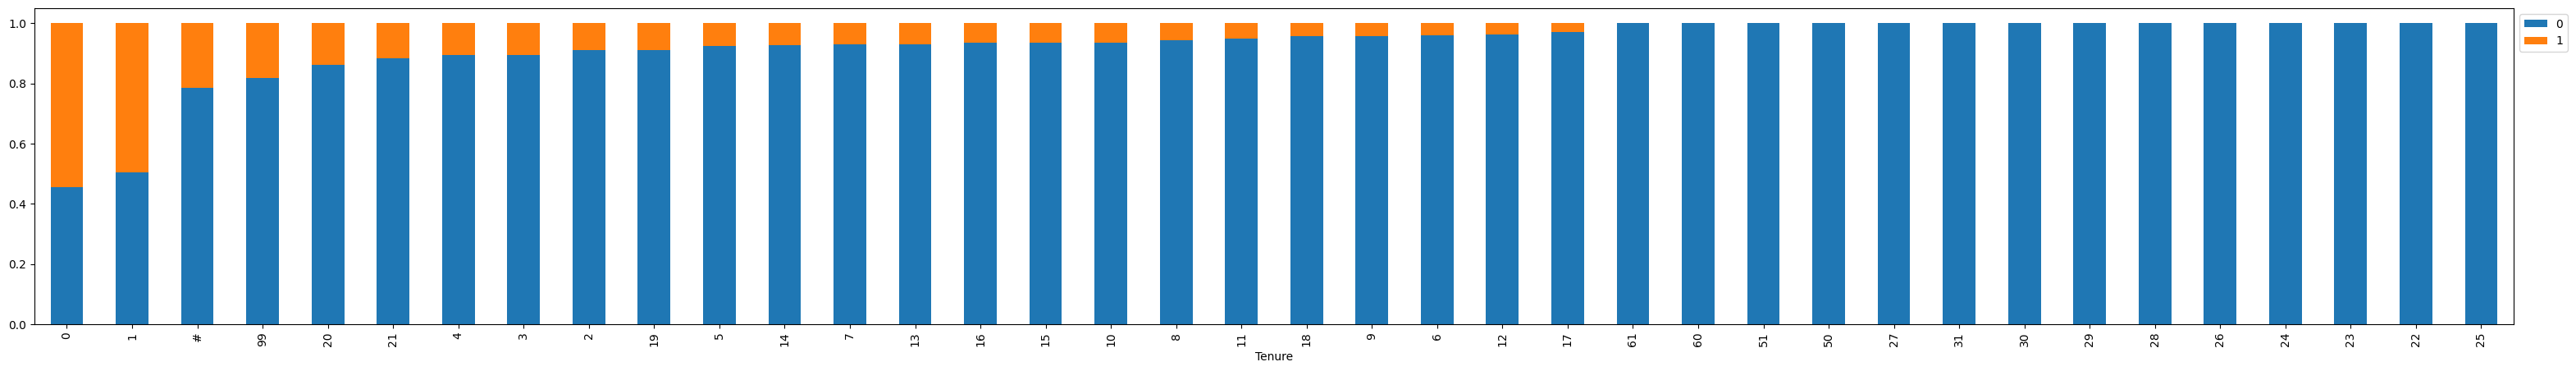

In [34]:
stacked_barplot(data, "Tenure", "Churn")

- As expected, customers with lower Tenure are more likely to churn.

Churn                0     1    All
Payment                            
All               9277  1874  11151
Debit Card        3885   702   4587
Credit Card       3012   499   3511
E wallet           941   276   1217
Cash on Delivery   760   254   1014
UPI                679   143    822
------------------------------------------------------------------------------------------------------------------------


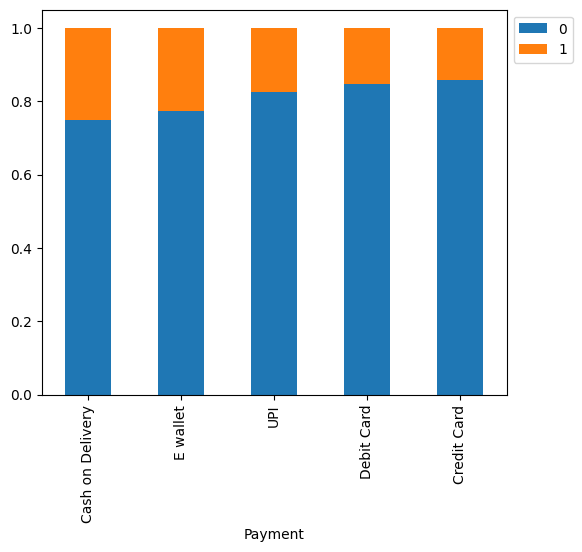

In [35]:
stacked_barplot(data, "Payment", "Churn")

- Customers that pay via 'Cash on Delivery' and 'E wallet' are more likely to churn.
- Customers that pay via 'Credit Card' or 'Debit Card' are less likely to churn.

Churn      0     1    All
Gender                   
All     9278  1874  11152
Male    5221  1107   6328
Female  3527   651   4178
M        298    78    376
F        232    38    270
------------------------------------------------------------------------------------------------------------------------


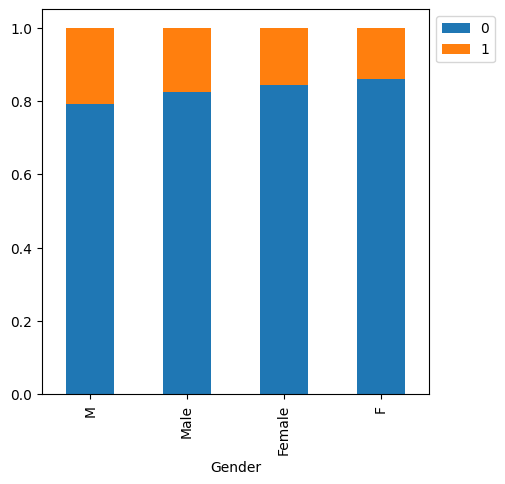

In [36]:
stacked_barplot(data, "Gender", "Churn")

- Unlikely that gender plays a significant role in churn.

Churn                  0     1    All
Account_user_count                   
All                 9271  1877  11148
4                   3811   758   4569
3                   2772   489   3261
5                   1317   382   1699
6                    206   109    315
2                    478    48    526
@                    285    47    332
1                    402    44    446
------------------------------------------------------------------------------------------------------------------------


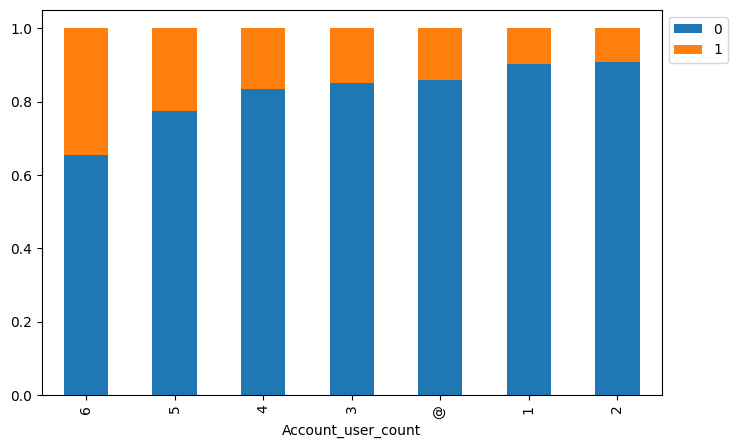

In [37]:
stacked_barplot(data, "Account_user_count", "Churn")

- The more users on an account, the more likely the account is to churn.

Churn               0     1    All
account_segment                   
All              9285  1878  11163
Regular Plus     2802  1060   3862
Super            3646   416   4062
HNI              1384   255   1639
Regular +         195    67    262
Regular           480    40    520
Super Plus        732    39    771
Super +            46     1     47
------------------------------------------------------------------------------------------------------------------------


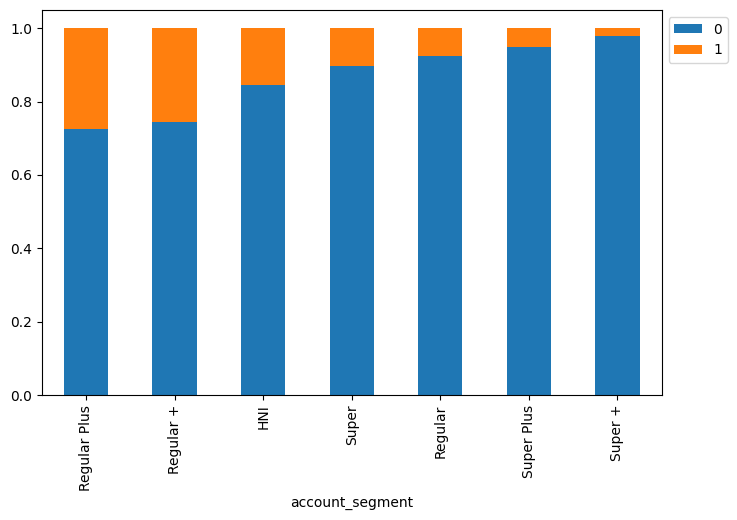

In [38]:
stacked_barplot(data, "account_segment", "Churn")

- 'Regular Plus' accounts are most likely to churn, followed by 'HNI'.

Churn              0     1    All
Marital_Status                   
All             9184  1864  11048
Single          2573   947   3520
Married         5187   673   5860
Divorced        1424   244   1668
------------------------------------------------------------------------------------------------------------------------


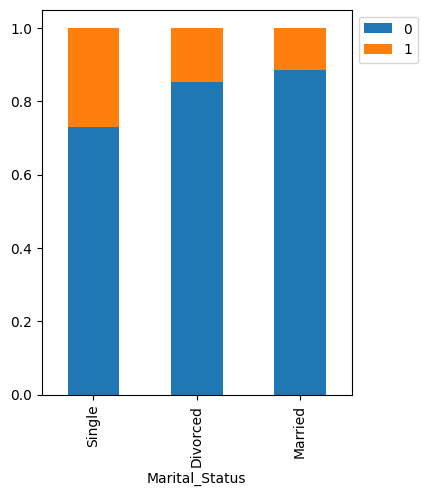

In [39]:
stacked_barplot(data, "Marital_Status", "Churn")

- 'Single' accounts are more likely to churn.

Churn             0     1    All
rev_per_month                   
All            9278  1880  11158
3              1447   299   1746
2              1315   270   1585
5              1139   198   1337
6               899   186   1085
4              1048   170   1218
7               602   152    754
8               523   120    643
+               584   105    689
9               465    99    564
10              341    72    413
11              215    63    278
1               354    48    402
12              129    37    166
13               76    17     93
15               15     9     24
14               40     8     48
118               1     3      4
102               5     3      8
129               2     2      4
124               3     2      5
134               0     2      2
136               2     2      4
19                0     2      2
20                0     1      1
22                1     1      2
138               2     1      3
105               1     1      2
127       

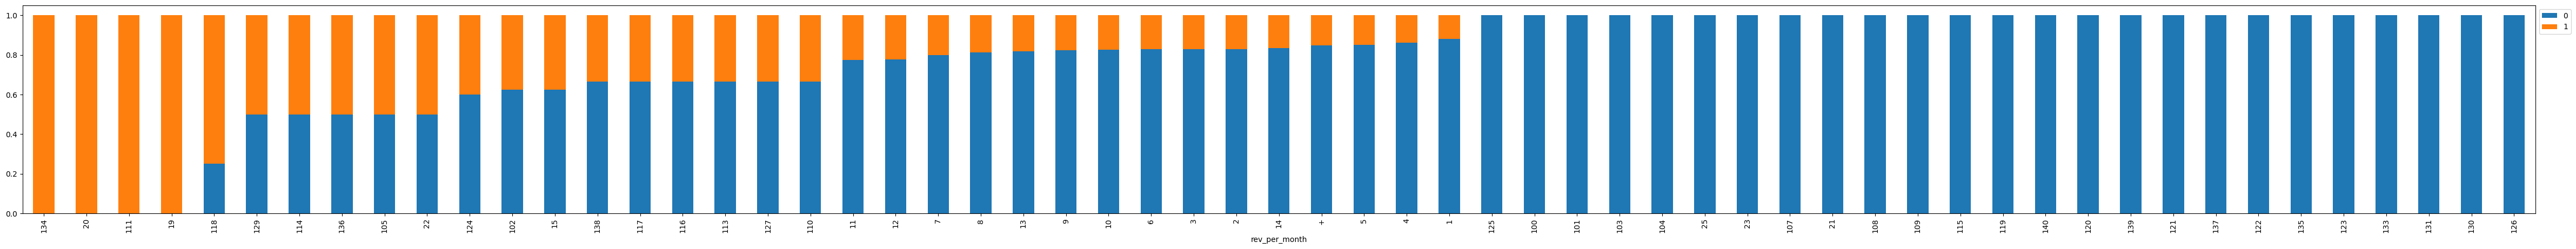

In [40]:
stacked_barplot(data, "rev_per_month", "Churn")

- It looks like higher-revenue accounts are more likely to churn (19, 20, 22)

Churn              0     1    All
rev_growth_yoy                   
All             9364  1896  11260
13              1157   270   1427
14              1283   241   1524
12               985   225   1210
15              1105   178   1283
16               782   167    949
17               574   130    704
18               593   115    708
11               418   105    523
19               533    86    619
20               486    76    562
23               275    70    345
22               337    66    403
21               378    55    433
24               177    52    229
25               145    43    188
26                89     9     98
27                29     6     35
28                13     1     14
4                  2     1      3
$                  3     0      3
------------------------------------------------------------------------------------------------------------------------


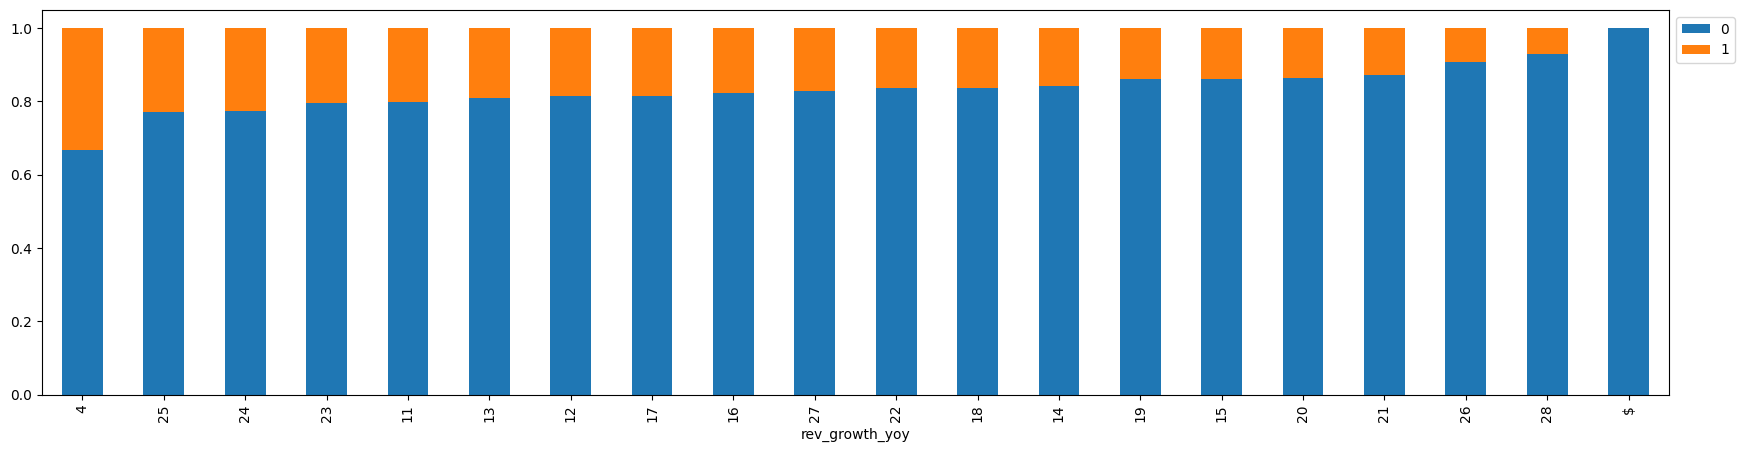

In [41]:
stacked_barplot(data, "rev_growth_yoy", "Churn")

- 23, 24, 25 seem to be more likely to churn.

Churn                       0     1    All
coupon_used_for_payment                   
All                      9364  1896  11260
1                        3613   760   4373
2                        2210   446   2656
0                        1776   374   2150
3                         602    96    698
4                         362    62    424
5                         238    46    284
7                         148    36    184
6                         198    36    234
8                          68    20     88
10                         28     6     34
9                          30     4     34
11                         26     4     30
15                          2     2      4
16                          2     2      4
12                         24     2     26
$                           1     0      1
14                         12     0     12
13                         22     0     22
*                           1     0      1
#                           1     0      1
-----------

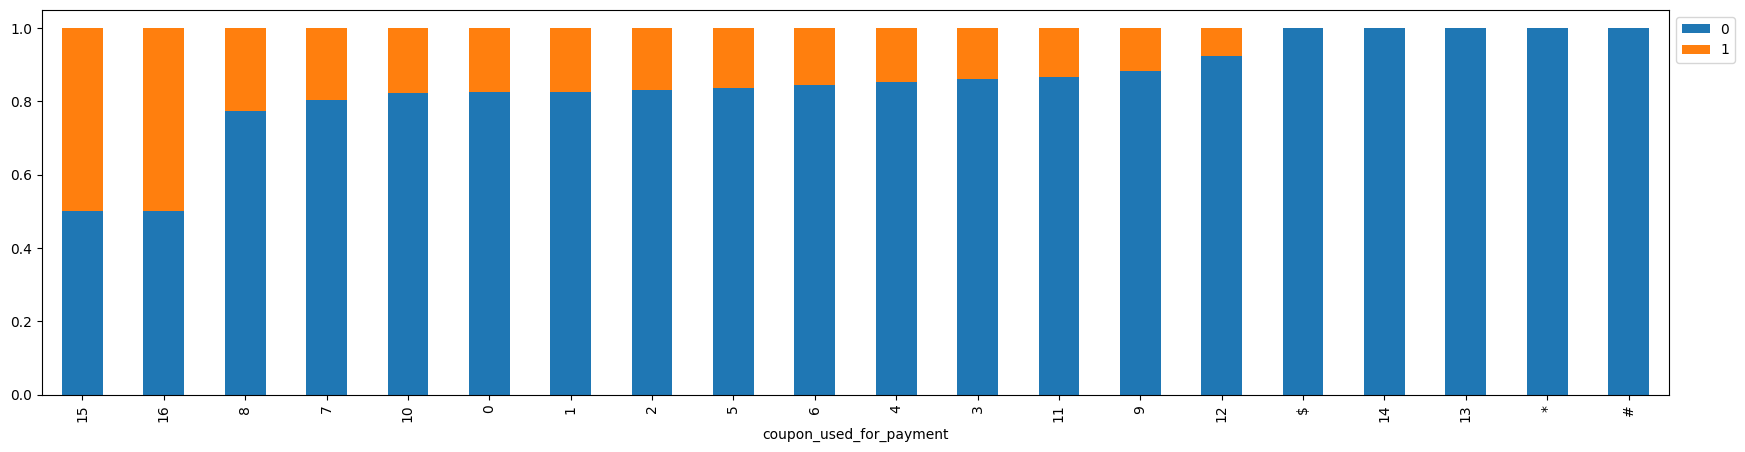

In [42]:
stacked_barplot(data, "coupon_used_for_payment", "Churn")

- Doesn't appear this variable has much correlation with churn.

Churn                    0     1    All
Day_Since_CC_connect                   
All                   9071  1832  10903
1                      880   376   1256
0                      638   326    964
3                     1551   265   1816
2                     1339   235   1574
8                     1012   157   1169
7                      776   135    911
4                      777   116    893
9                      558    64    622
5                      424    55    479
10                     305    34    339
6                      197    32    229
11                     167    16    183
14                      66     8     74
15                      30     7     37
12                     143     3    146
47                       0     2      2
46                       0     1      1
31                       2     0      2
13                     117     0    117
30                       2     0      2
18                      26     0     26
17                      34     0     34


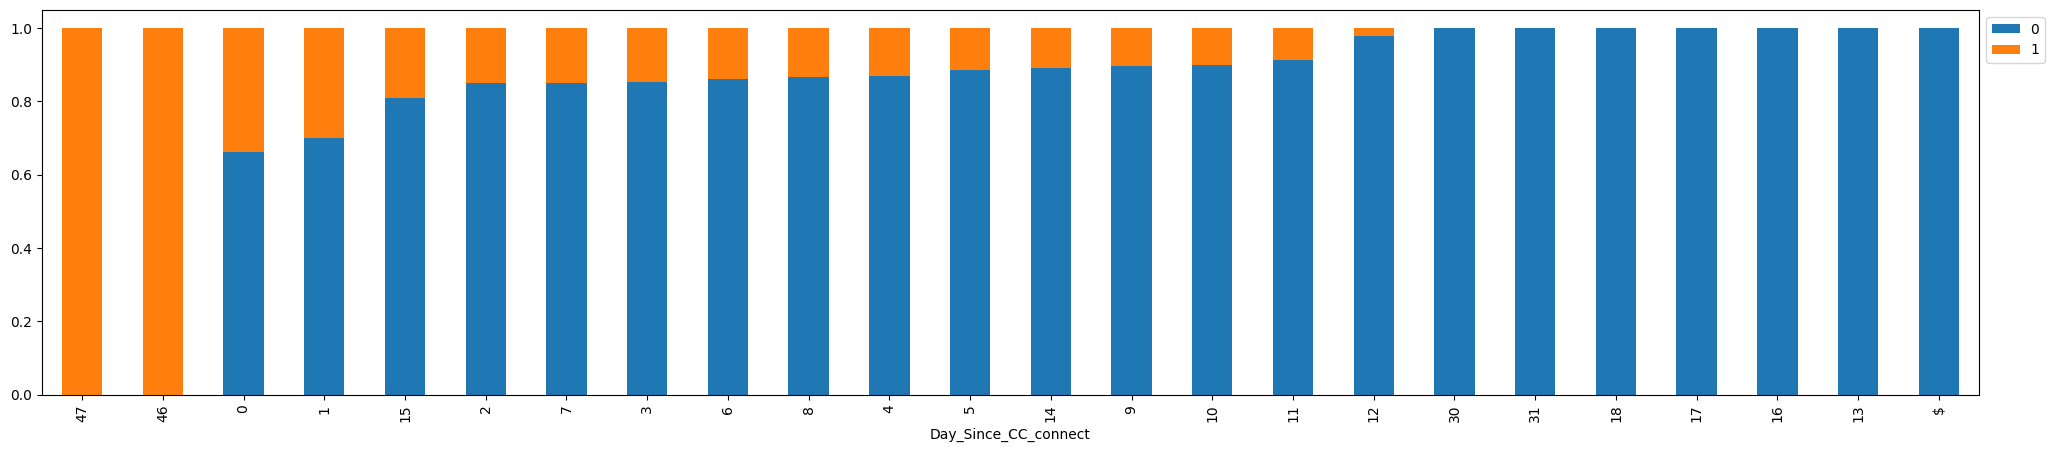

In [43]:
stacked_barplot(data, "Day_Since_CC_connect", "Churn")

- Accounts with customers who have contacted customer service within the past day are more likely to churn.

Churn            0     1    All
Login_device                   
All           9185  1854  11039
Mobile        6310  1172   7482
Computer      2421   597   3018
&&&&           454    85    539
------------------------------------------------------------------------------------------------------------------------


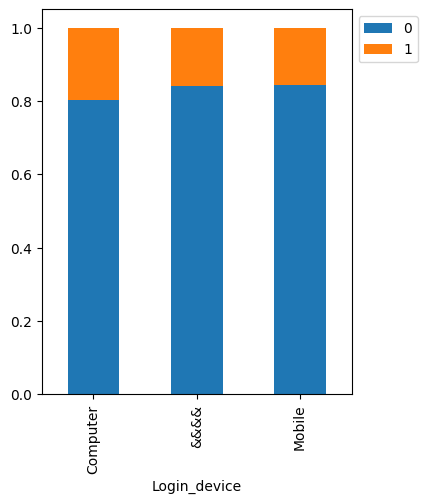

In [44]:
stacked_barplot(data, "Login_device", "Churn")

- This variable does not appear to have more correlation with churn, although customers that login via Computer are slightly more likely to churn.

### Data Pre-Processing

In [45]:
df = data.copy()

In [46]:
# drop Account ID
df.drop(columns=['AccountID'], inplace=True)

In [47]:
df.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,1,4,3.000,6.000,Debit Card,Female,3.000,3,Super,2.000,Single,9,1.000,11,1,5,160,Mobile
1,1,0,1.000,8.000,UPI,Male,3.000,4,Regular Plus,3.000,Single,7,1.000,15,0,0,121,Mobile
2,1,0,1.000,30.000,Debit Card,Male,2.000,4,Regular Plus,3.000,Single,6,1.000,14,0,3,NaN,Mobile
3,1,0,3.000,15.000,Debit Card,Male,2.000,4,Super,5.000,Single,8,0.000,23,0,3,134,Mobile
4,1,0,1.000,12.000,Credit Card,Male,2.000,3,Regular Plus,5.000,Single,3,0.000,11,1,3,130,Mobile


In [48]:
df['Tenure'] = df['Tenure'].replace('#', '3')

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11158 non-null  object 
 2   City_Tier                11148 non-null  float64
 3   CC_Contacted_LY          11158 non-null  float64
 4   Payment                  11151 non-null  object 
 5   Gender                   11152 non-null  object 
 6   Service_Score            11162 non-null  float64
 7   Account_user_count       11148 non-null  object 
 8   account_segment          11163 non-null  object 
 9   CC_Agent_Score           11144 non-null  float64
 10  Marital_Status           11048 non-null  object 
 11  rev_per_month            11158 non-null  object 
 12  Complain_ly              10903 non-null  float64
 13  rev_growth_yoy           11260 non-null  object 
 14  coupon_used_for_paymen

In [54]:
df['Tenure'] = pd.to_numeric(df['Tenure'])

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11158 non-null  float64
 2   City_Tier                11148 non-null  float64
 3   CC_Contacted_LY          11158 non-null  float64
 4   Payment                  11151 non-null  object 
 5   Gender                   11152 non-null  object 
 6   Service_Score            11162 non-null  float64
 7   Account_user_count       11148 non-null  object 
 8   account_segment          11163 non-null  object 
 9   CC_Agent_Score           11144 non-null  float64
 10  Marital_Status           11048 non-null  object 
 11  rev_per_month            11158 non-null  object 
 12  Complain_ly              10903 non-null  float64
 13  rev_growth_yoy           11260 non-null  object 
 14  coupon_used_for_paymen

In [58]:
df['CC_Contacted_LY'] = df['CC_Contacted_LY'].clip(upper=42)

In [60]:
df['Gender'] = df['Gender'].replace('M', 'Male')

In [61]:
df['Gender'] = df['Gender'].replace('F', 'Female')

In [62]:
df['Gender'].value_counts()

Male      6704
Female    4448
Name: Gender, dtype: int64

In [64]:
df['Account_user_count'] = df['Account_user_count'].replace('@', '2')

In [65]:
df['Account_user_count'] = pd.to_numeric(df['Account_user_count'])

In [66]:
df['Account_user_count'].value_counts()

4.000    4569
3.000    3261
5.000    1699
2.000     858
1.000     446
6.000     315
Name: Account_user_count, dtype: int64

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11158 non-null  float64
 2   City_Tier                11148 non-null  float64
 3   CC_Contacted_LY          11158 non-null  float64
 4   Payment                  11151 non-null  object 
 5   Gender                   11152 non-null  object 
 6   Service_Score            11162 non-null  float64
 7   Account_user_count       11148 non-null  float64
 8   account_segment          11163 non-null  object 
 9   CC_Agent_Score           11144 non-null  float64
 10  Marital_Status           11048 non-null  object 
 11  rev_per_month            11158 non-null  object 
 12  Complain_ly              10903 non-null  float64
 13  rev_growth_yoy           11260 non-null  object 
 14  coupon_used_for_paymen

In [68]:
df['account_segment'] = df['account_segment'].replace('Regular +', 'Regular Plus')

In [69]:
df['account_segment'] = df['account_segment'].replace('Super +', 'Super Plus')

In [70]:
df['account_segment'].value_counts()

Regular Plus    4124
Super           4062
HNI             1639
Super Plus       818
Regular          520
Name: account_segment, dtype: int64

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11158 non-null  float64
 2   City_Tier                11148 non-null  float64
 3   CC_Contacted_LY          11158 non-null  float64
 4   Payment                  11151 non-null  object 
 5   Gender                   11152 non-null  object 
 6   Service_Score            11162 non-null  float64
 7   Account_user_count       11148 non-null  float64
 8   account_segment          11163 non-null  object 
 9   CC_Agent_Score           11144 non-null  float64
 10  Marital_Status           11048 non-null  object 
 11  rev_per_month            11158 non-null  object 
 12  Complain_ly              10903 non-null  float64
 13  rev_growth_yoy           11260 non-null  object 
 14  coupon_used_for_paymen

In [73]:
df['rev_per_month'] = df['rev_per_month'].replace('+', np.nan)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11158 non-null  float64
 2   City_Tier                11148 non-null  float64
 3   CC_Contacted_LY          11158 non-null  float64
 4   Payment                  11151 non-null  object 
 5   Gender                   11152 non-null  object 
 6   Service_Score            11162 non-null  float64
 7   Account_user_count       11148 non-null  float64
 8   account_segment          11163 non-null  object 
 9   CC_Agent_Score           11144 non-null  float64
 10  Marital_Status           11048 non-null  object 
 11  rev_per_month            10469 non-null  object 
 12  Complain_ly              10903 non-null  float64
 13  rev_growth_yoy           11260 non-null  object 
 14  coupon_used_for_paymen

In [75]:
df['rev_per_month'] = pd.to_numeric(df['rev_per_month'])

In [76]:
df['rev_growth_yoy'] = df['rev_growth_yoy'].replace('$', '4')

In [77]:
df['rev_growth_yoy'] = pd.to_numeric(df['rev_growth_yoy'])

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11158 non-null  float64
 2   City_Tier                11148 non-null  float64
 3   CC_Contacted_LY          11158 non-null  float64
 4   Payment                  11151 non-null  object 
 5   Gender                   11152 non-null  object 
 6   Service_Score            11162 non-null  float64
 7   Account_user_count       11148 non-null  float64
 8   account_segment          11163 non-null  object 
 9   CC_Agent_Score           11144 non-null  float64
 10  Marital_Status           11048 non-null  object 
 11  rev_per_month            10469 non-null  float64
 12  Complain_ly              10903 non-null  float64
 13  rev_growth_yoy           11260 non-null  int64  
 14  coupon_used_for_paymen

In [79]:
df['coupon_used_for_payment'] = df['coupon_used_for_payment'].replace('#', '3')

In [80]:
df['coupon_used_for_payment'] = df['coupon_used_for_payment'].replace('$', '4')

In [81]:
df['coupon_used_for_payment'] = df['coupon_used_for_payment'].replace('*', '8')

In [82]:
df['coupon_used_for_payment'] = pd.to_numeric(df['coupon_used_for_payment'])

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11158 non-null  float64
 2   City_Tier                11148 non-null  float64
 3   CC_Contacted_LY          11158 non-null  float64
 4   Payment                  11151 non-null  object 
 5   Gender                   11152 non-null  object 
 6   Service_Score            11162 non-null  float64
 7   Account_user_count       11148 non-null  float64
 8   account_segment          11163 non-null  object 
 9   CC_Agent_Score           11144 non-null  float64
 10  Marital_Status           11048 non-null  object 
 11  rev_per_month            10469 non-null  float64
 12  Complain_ly              10903 non-null  float64
 13  rev_growth_yoy           11260 non-null  int64  
 14  coupon_used_for_paymen

In [84]:
df['Day_Since_CC_connect'] = df['Day_Since_CC_connect'].replace('$', '4')

In [85]:
df['Day_Since_CC_connect'] = pd.to_numeric(df['Day_Since_CC_connect'])

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11158 non-null  float64
 2   City_Tier                11148 non-null  float64
 3   CC_Contacted_LY          11158 non-null  float64
 4   Payment                  11151 non-null  object 
 5   Gender                   11152 non-null  object 
 6   Service_Score            11162 non-null  float64
 7   Account_user_count       11148 non-null  float64
 8   account_segment          11163 non-null  object 
 9   CC_Agent_Score           11144 non-null  float64
 10  Marital_Status           11048 non-null  object 
 11  rev_per_month            10469 non-null  float64
 12  Complain_ly              10903 non-null  float64
 13  rev_growth_yoy           11260 non-null  int64  
 14  coupon_used_for_paymen

In [87]:
df['cashback'] = df['cashback'].replace('$', '4')

In [88]:
df['cashback'] = pd.to_numeric(df['cashback'])

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11158 non-null  float64
 2   City_Tier                11148 non-null  float64
 3   CC_Contacted_LY          11158 non-null  float64
 4   Payment                  11151 non-null  object 
 5   Gender                   11152 non-null  object 
 6   Service_Score            11162 non-null  float64
 7   Account_user_count       11148 non-null  float64
 8   account_segment          11163 non-null  object 
 9   CC_Agent_Score           11144 non-null  float64
 10  Marital_Status           11048 non-null  object 
 11  rev_per_month            10469 non-null  float64
 12  Complain_ly              10903 non-null  float64
 13  rev_growth_yoy           11260 non-null  int64  
 14  coupon_used_for_paymen

In [90]:
df['Login_device'] = df['Login_device'].replace('&&&&', np.nan)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11158 non-null  float64
 2   City_Tier                11148 non-null  float64
 3   CC_Contacted_LY          11158 non-null  float64
 4   Payment                  11151 non-null  object 
 5   Gender                   11152 non-null  object 
 6   Service_Score            11162 non-null  float64
 7   Account_user_count       11148 non-null  float64
 8   account_segment          11163 non-null  object 
 9   CC_Agent_Score           11144 non-null  float64
 10  Marital_Status           11048 non-null  object 
 11  rev_per_month            10469 non-null  float64
 12  Complain_ly              10903 non-null  float64
 13  rev_growth_yoy           11260 non-null  int64  
 14  coupon_used_for_paymen

- Outliers have been treated.
- Typos have been corrected.
- All dtypes have been corrected.

### EDA

## Univariate Analysis

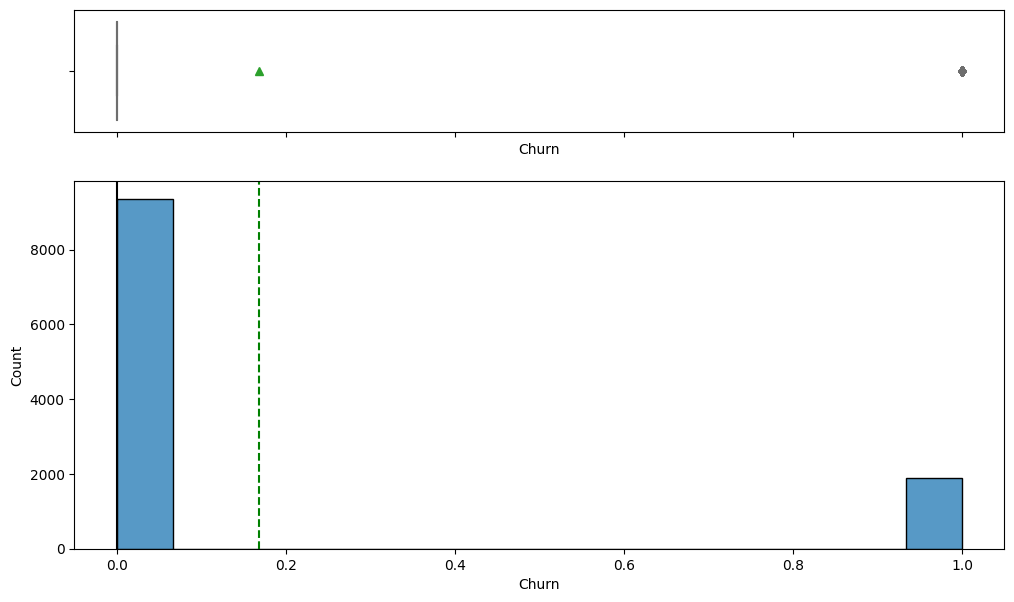

In [92]:
histogram_boxplot(df, "Churn")

- About 2000 churned
- The rest (about 9200) did not.

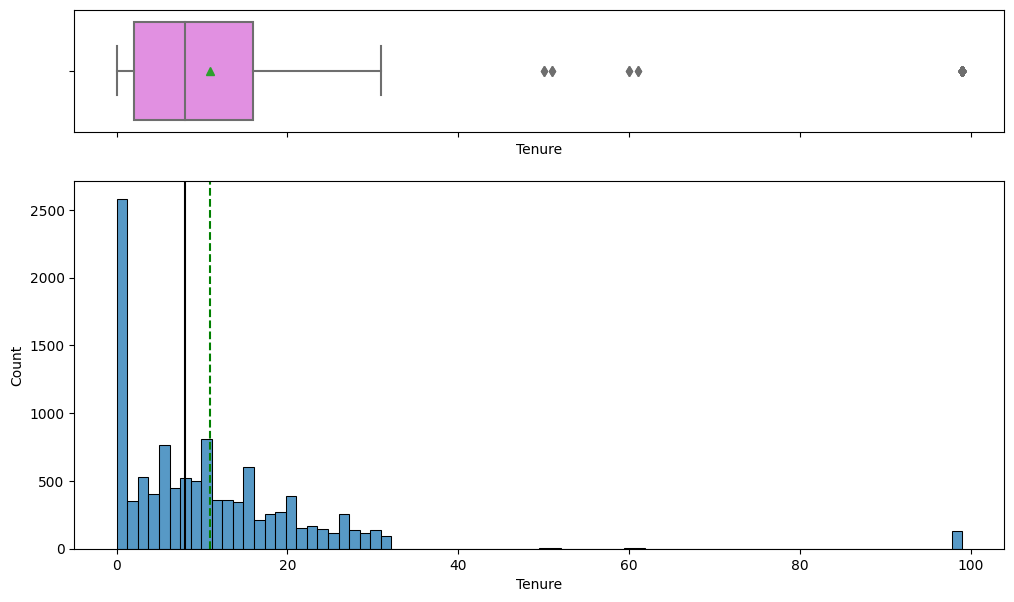

In [93]:
histogram_boxplot(df, "Tenure")

- Most accounts have 0 or 1
- Could be outliers at 99, but I'm not sure. Let's leave it as is.

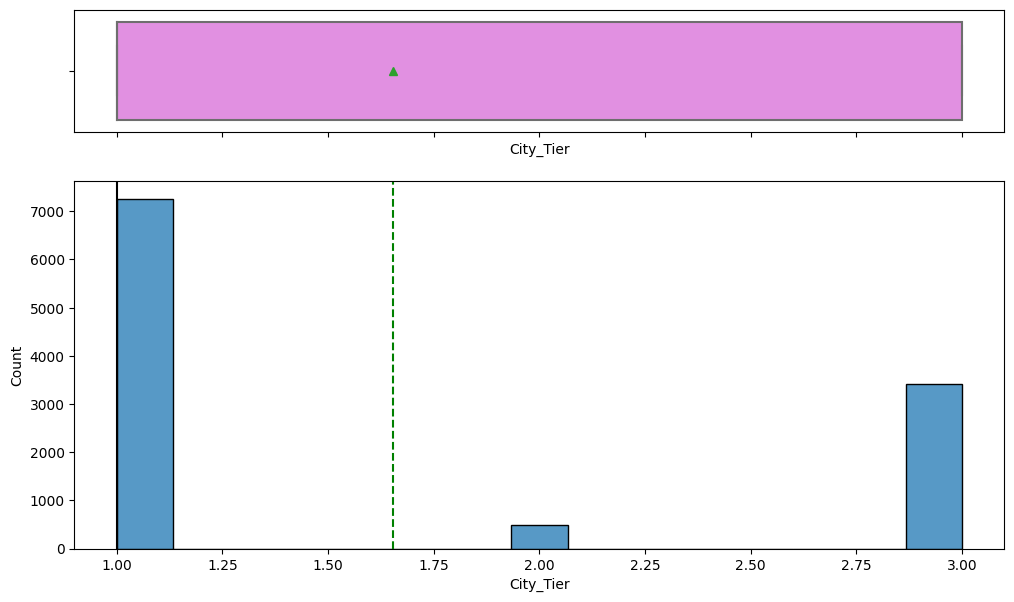

In [94]:
histogram_boxplot(df, "City_Tier")

- Not many Tier 2 cities (under 1000)
- Mostly Tier 1 cities (a little above 7000)
- About 3500 Tier 3 cities.

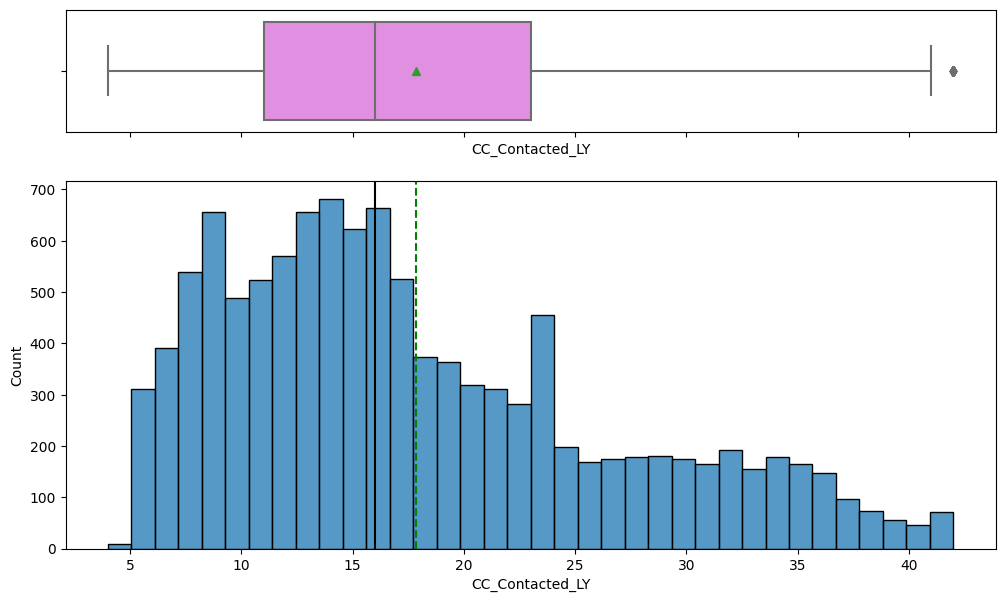

In [95]:
histogram_boxplot(df, "CC_Contacted_LY")

- Right-skewed
- Mostly between 5 and 24

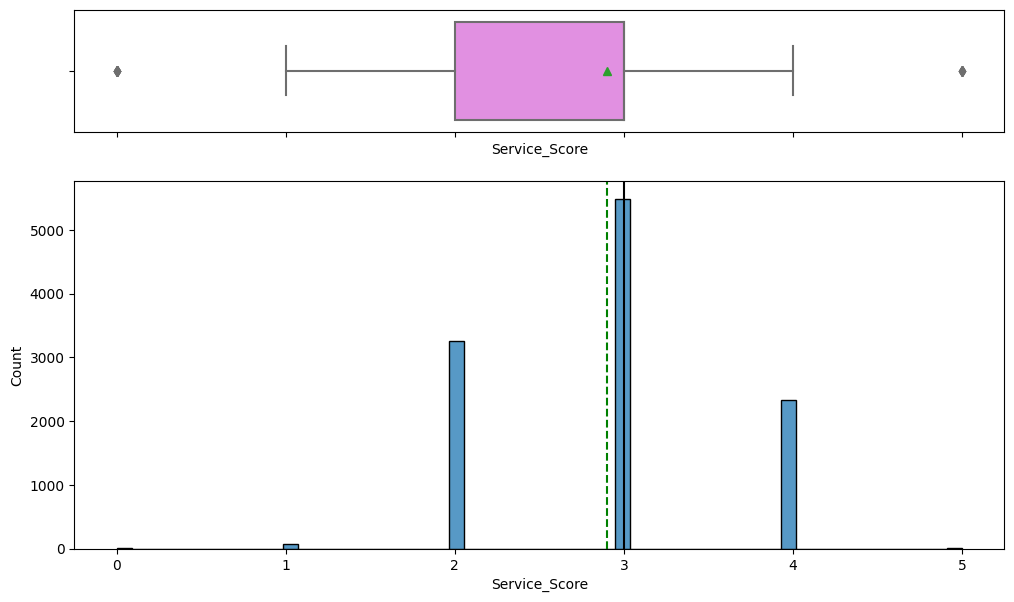

In [96]:
histogram_boxplot(df, "Service_Score")

- Most frequent response is 3, followed by 2, then 4

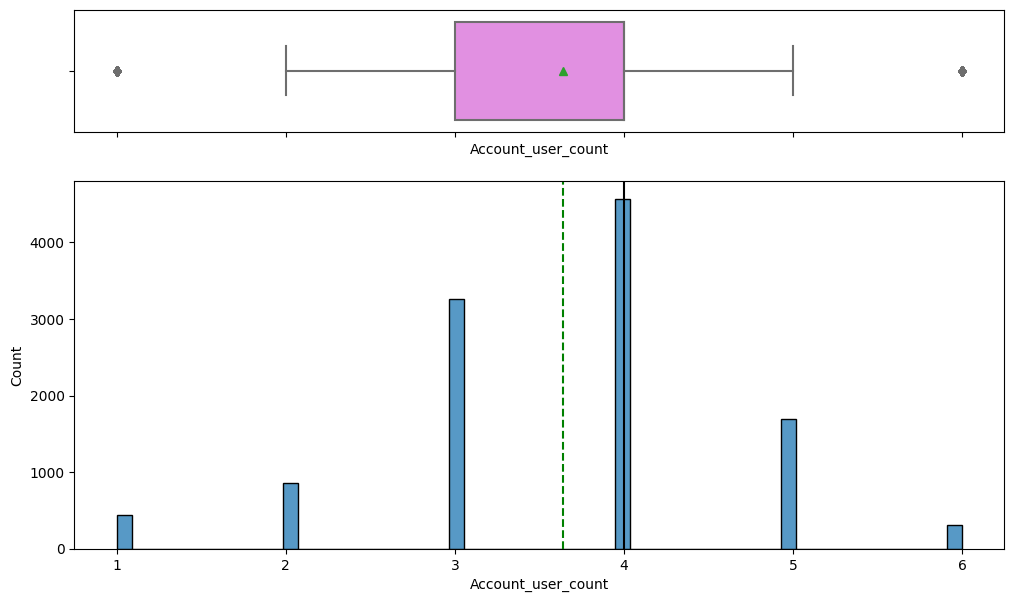

In [97]:
histogram_boxplot(df, "Account_user_count")

- The most frequent number of users on an account is 4, followed by 3, then 5, then 2, then 1, then 6

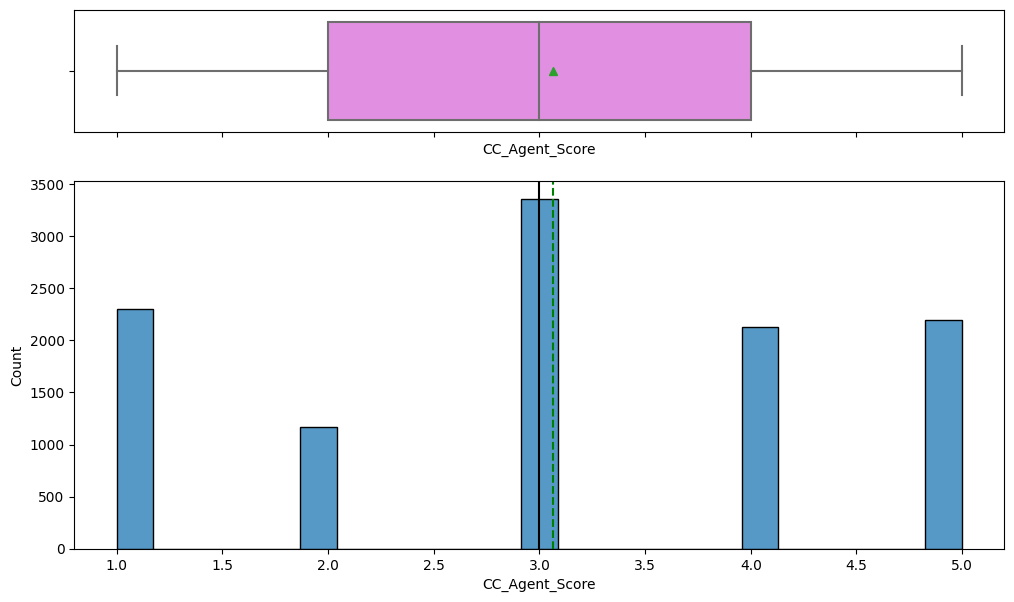

In [98]:
histogram_boxplot(df, "CC_Agent_Score")

- Most frequent response is 3.

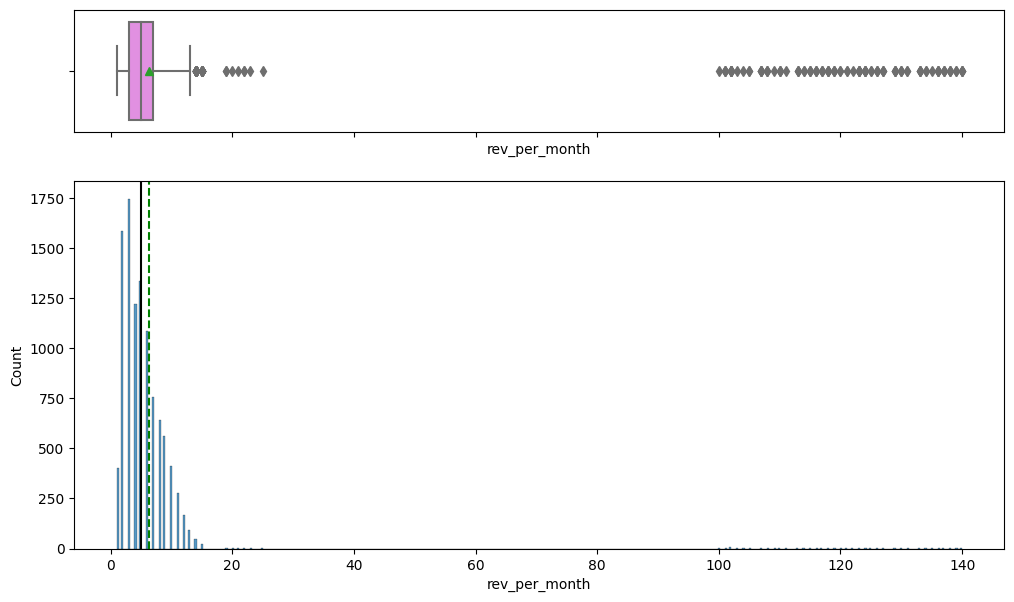

In [99]:
histogram_boxplot(df, "rev_per_month")

- Mostly 2-6

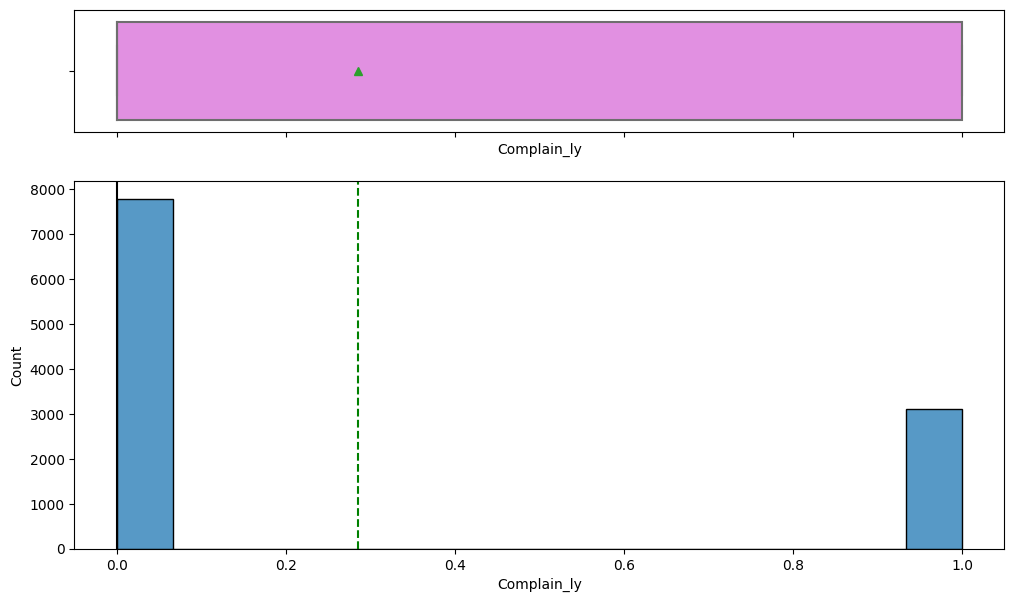

In [100]:
histogram_boxplot(df, "Complain_ly")

- Most accounts did NOT complain (about 8000).
- About 3300 accounts complained.

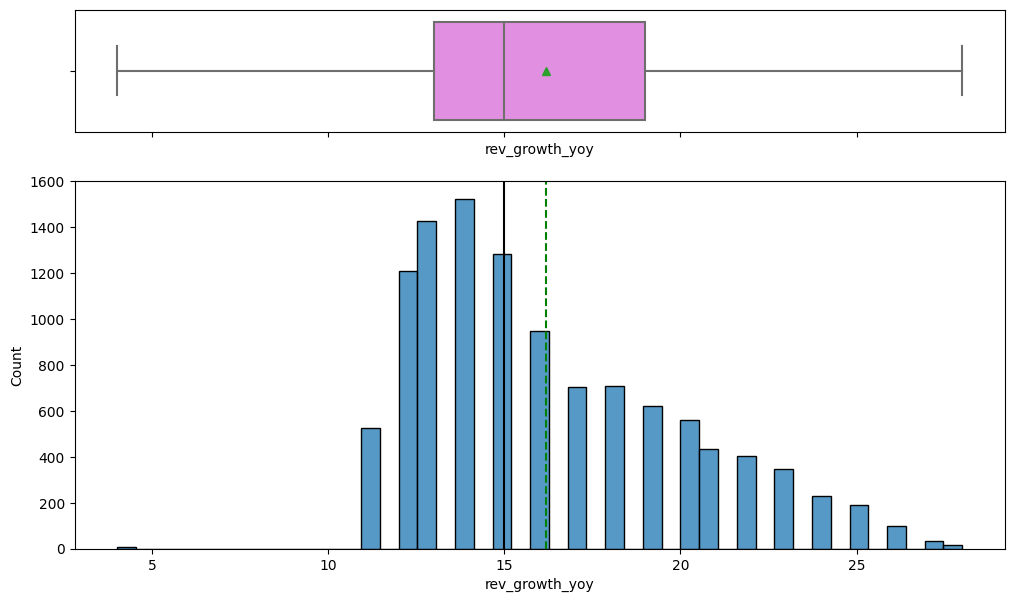

In [101]:
histogram_boxplot(df, "rev_growth_yoy")

- Mostly 12-15
- 4 is possibly an outlier, but can't be sure. Let's leave it as is.

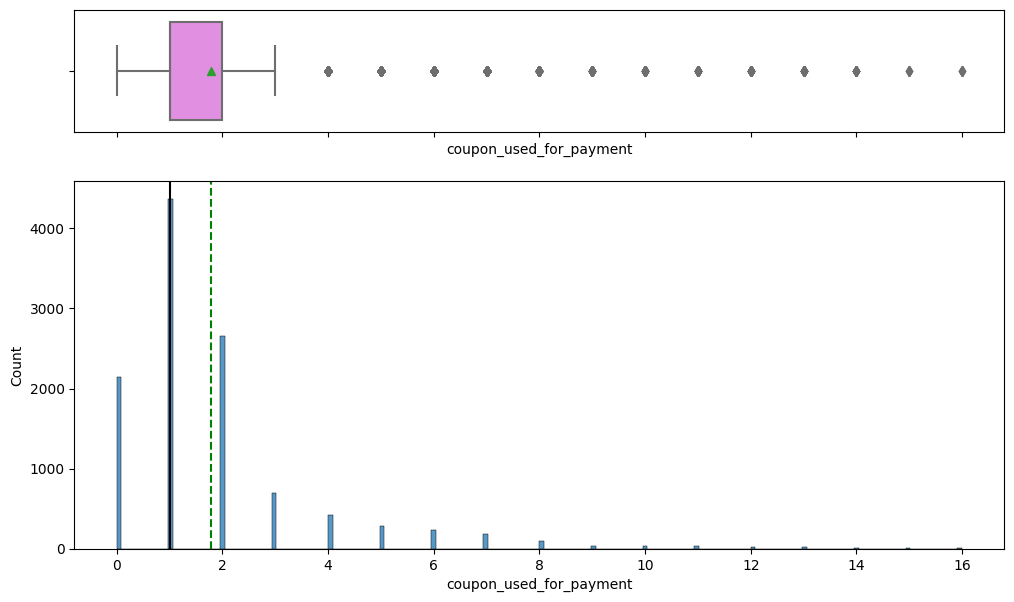

In [102]:
histogram_boxplot(df, "coupon_used_for_payment")

- Mostly 0-2

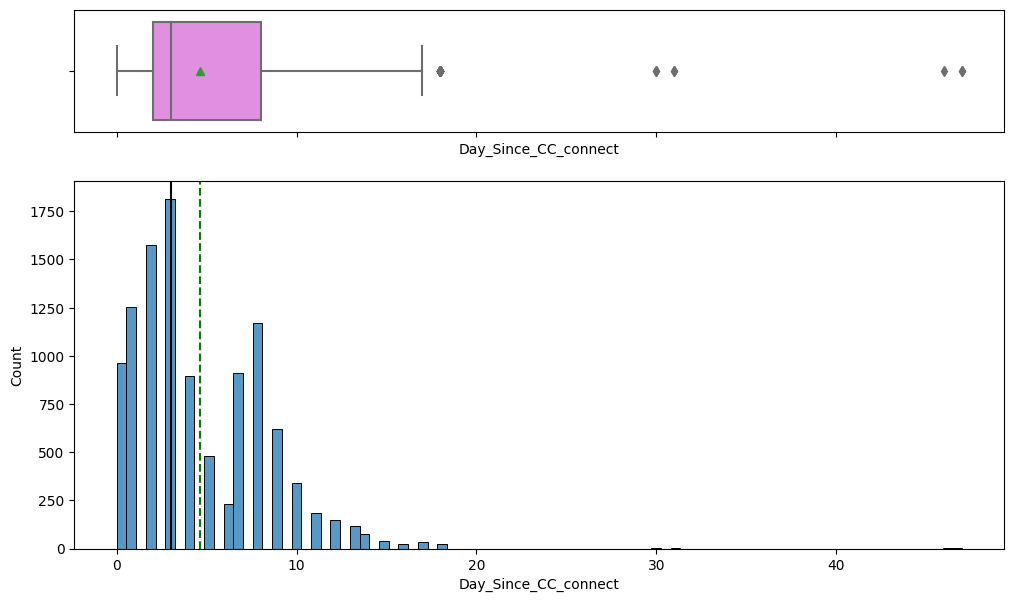

In [103]:
histogram_boxplot(df, "Day_Since_CC_connect")

- Average of about 5
- Possible outliers at 30+, but can't be sure. Let's leave them as is.

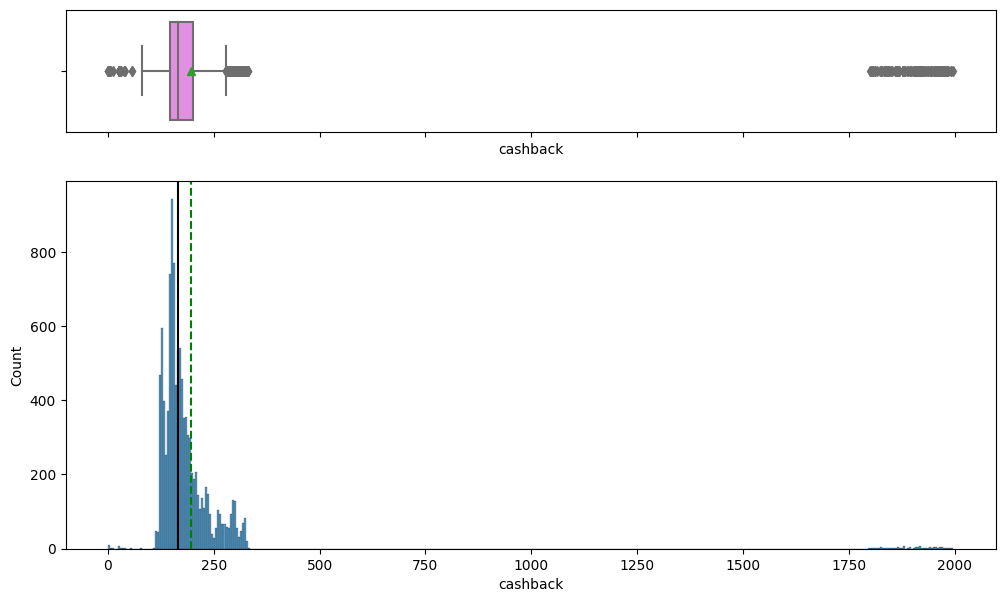

In [104]:
histogram_boxplot(df, "cashback")

- Mostly between 150 and 300
- Possible outliers above 1750, but can't be sure. Let's leave them as is.

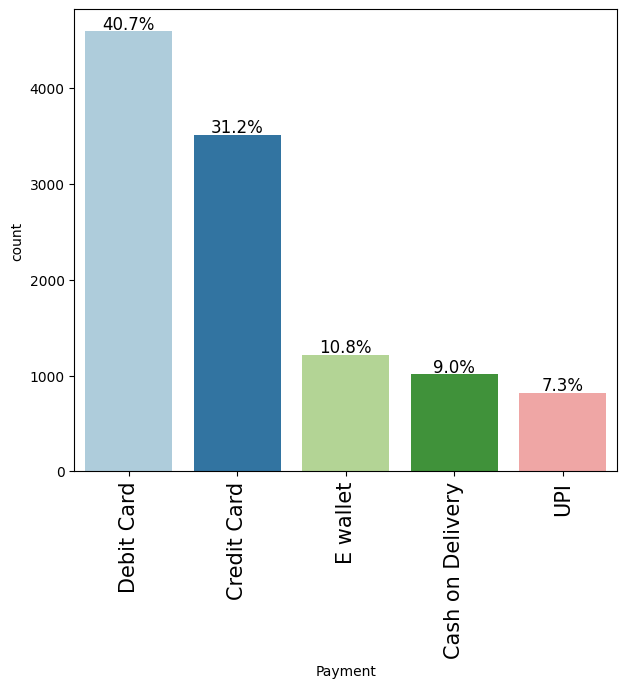

In [105]:
labeled_barplot(df, "Payment", perc=True)

- About 42% of accounts paid by Debit Card
- About 31% of accounts paid by Credit Card
- The remaining accounts paid either by E-wallet (11%), Cash on Delivery (9%), or UPI (7%)

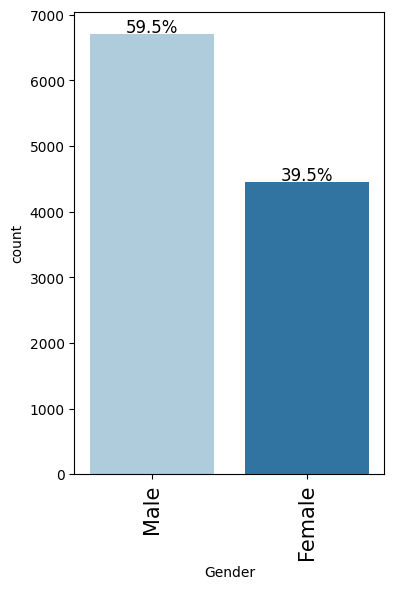

In [106]:
labeled_barplot(df, "Gender", perc=True)

- About 60% Male, 40% Female

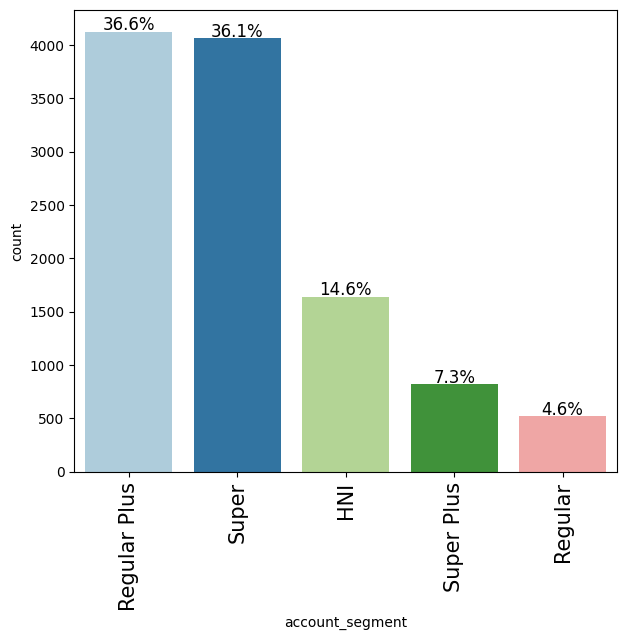

In [107]:
labeled_barplot(df, "account_segment", perc=True)

- Mostly Regular Plus (37.5%) and Super (36%)
- Followed by HNI (14.5%), Super Plus (7%), and Regular (4.5%)

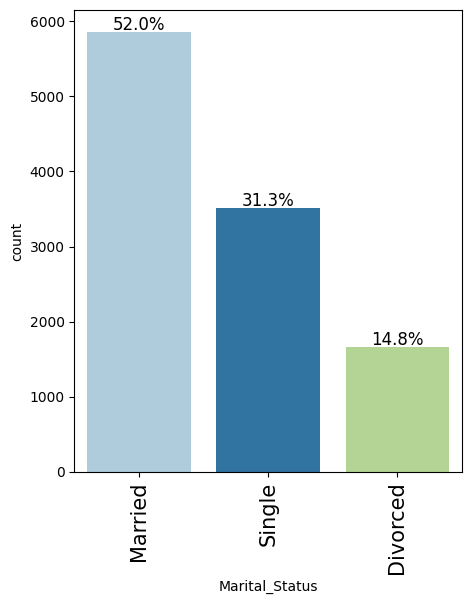

In [108]:
labeled_barplot(df, "Marital_Status", perc=True)

- About 54% Married, 31% Single, and 15% Divorced
- Kept Divorced in case that affects the model (instead of labeling it 'Single')

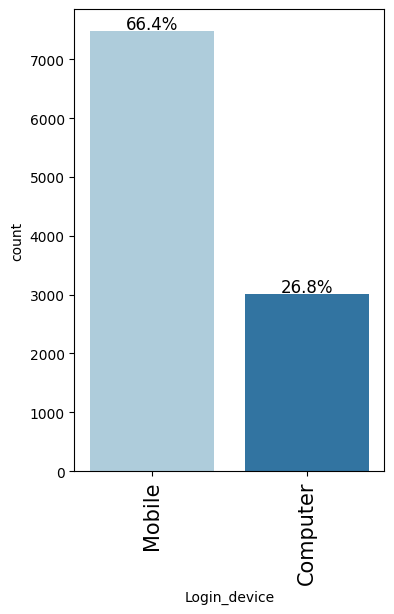

In [109]:
labeled_barplot(df, "Login_device", perc=True)

- Mostly Mobile with 73%
- Computer had about 27%

## Bivariate Analysis

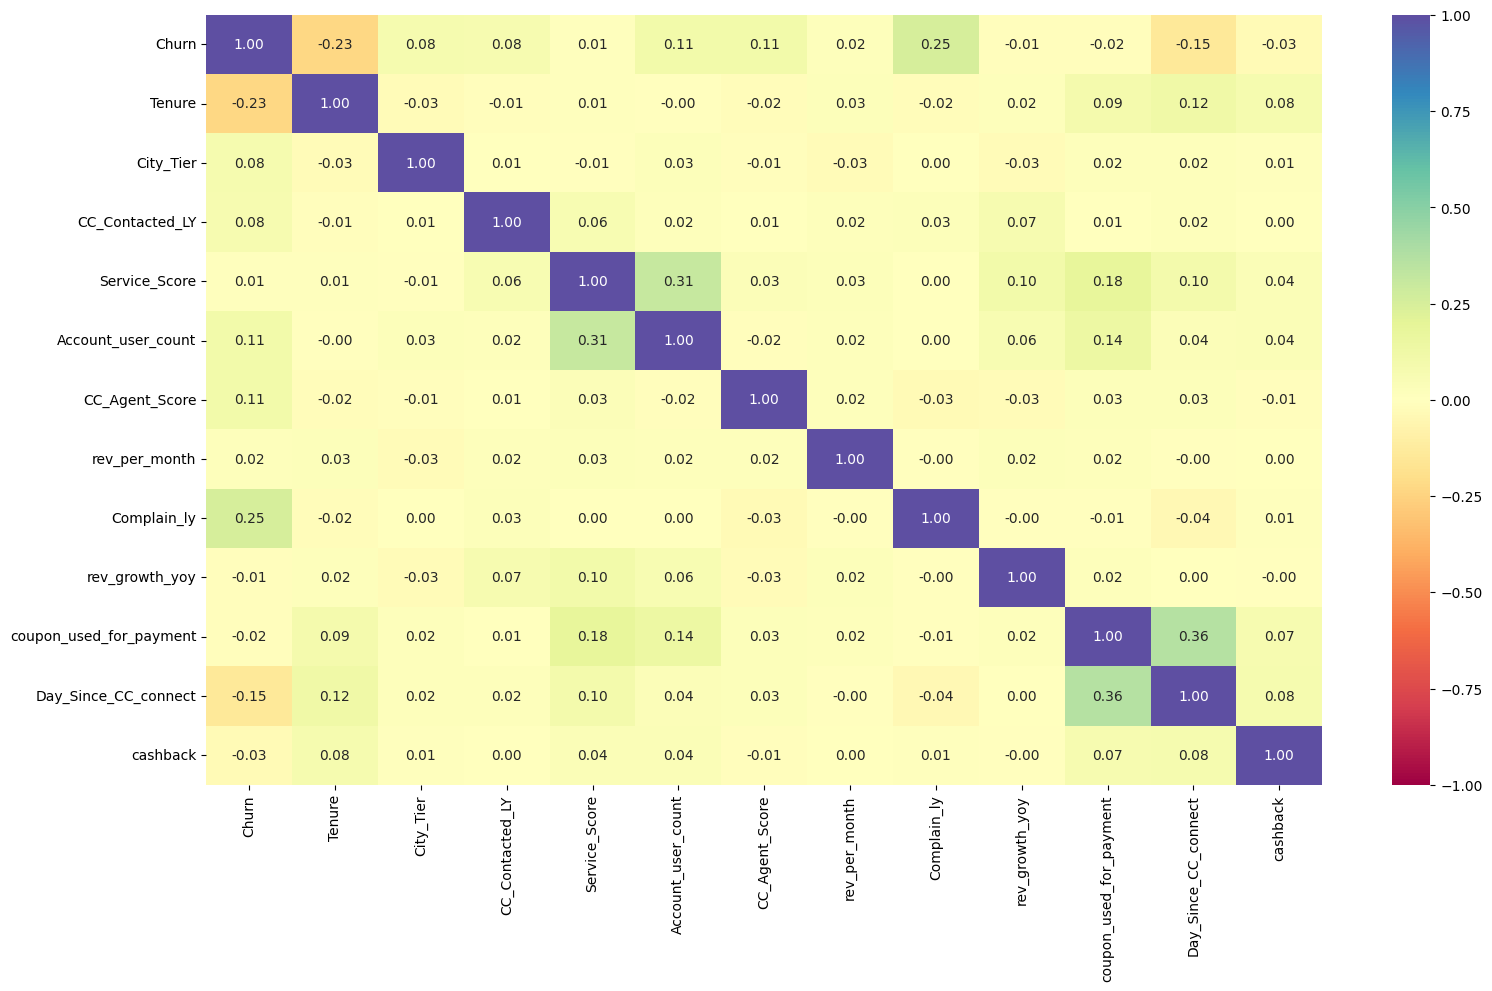

In [110]:
plt.figure(figsize=(18, 10))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- Slight (-.23) negative correlation between Tenure length and Churn (Target variable)
- Modest (.35) positive correlation between coupon_used and Day_Since_CC_connect
- Modest (.3) positive correlation between Service_Score and Account_user_count
- Modest (.25) positive correlation between Complain_ly and Churn (Target)
- Slight (-.15) negative correlation between Day_Since_CC_connect and Churn (Target)

In [111]:
sns.pairplot(df, hue="Churn")

Output hidden; open in https://colab.research.google.com to view.

- Little to no correlation between numeric variables

Churn                0     1    All
Payment                            
All               9277  1874  11151
Debit Card        3885   702   4587
Credit Card       3012   499   3511
E wallet           941   276   1217
Cash on Delivery   760   254   1014
UPI                679   143    822
------------------------------------------------------------------------------------------------------------------------


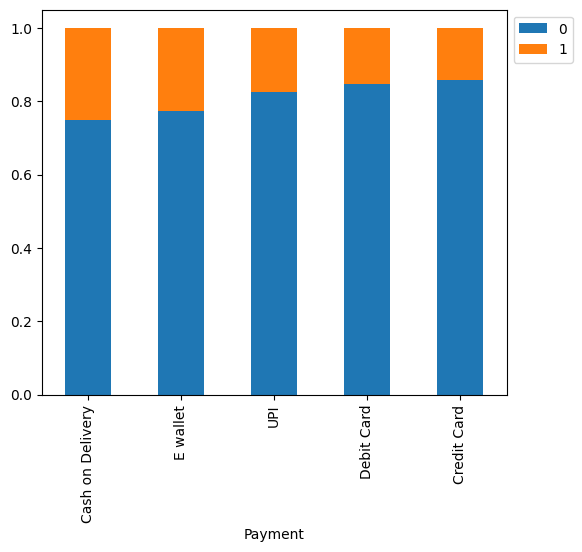

In [112]:
stacked_barplot(df, "Payment", "Churn")

- Customers that pay via 'Cash on Delivery' and 'E wallet' are more likely to churn.
- Customers that pay via 'Credit Card' or 'Debit Card' are less likely to churn.

Churn      0     1    All
Gender                   
All     9278  1874  11152
Male    5519  1185   6704
Female  3759   689   4448
------------------------------------------------------------------------------------------------------------------------


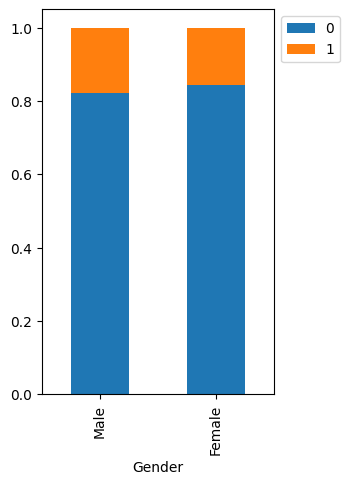

In [113]:
stacked_barplot(df, "Gender", "Churn")

- Male customers are slightly more likely to churn, based on this barplot

Churn               0     1    All
account_segment                   
All              9285  1878  11163
Regular Plus     2997  1127   4124
Super            3646   416   4062
HNI              1384   255   1639
Regular           480    40    520
Super Plus        778    40    818
------------------------------------------------------------------------------------------------------------------------


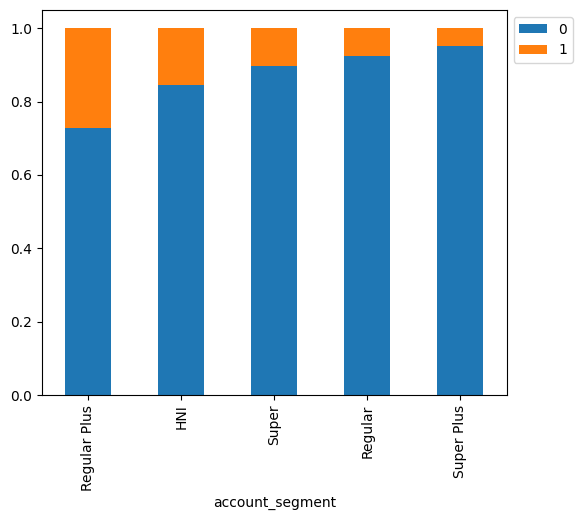

In [114]:
stacked_barplot(df, "account_segment", "Churn")

- Accounts with 'Regular Plus' are most likely to churn
- Followed by HNI, then Super.
- Regular and Super Plus are least likely to Churn.

Churn              0     1    All
Marital_Status                   
All             9184  1864  11048
Single          2573   947   3520
Married         5187   673   5860
Divorced        1424   244   1668
------------------------------------------------------------------------------------------------------------------------


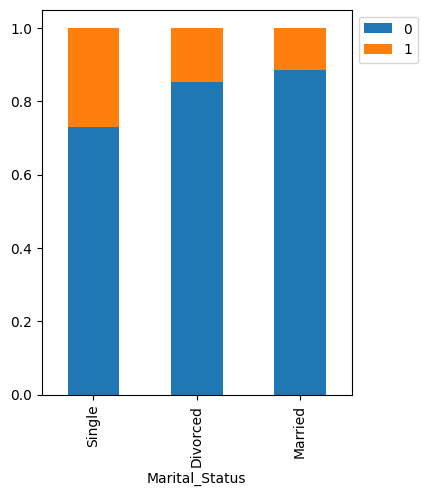

In [115]:
stacked_barplot(df, "Marital_Status", "Churn")

- 'Single' accounts are most likely to churn, followed by 'Divorced'.
- 'Married' accounts are least likely to churn.

Churn            0     1    All
Login_device                   
All           8731  1769  10500
Mobile        6310  1172   7482
Computer      2421   597   3018
------------------------------------------------------------------------------------------------------------------------


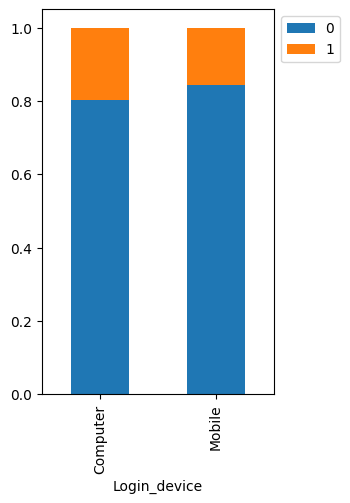

In [116]:
stacked_barplot(df, "Login_device", "Churn")

- Accounts that use Computers to login are slightly more likely to churn.
- This does not appear to be significant.

## Data Pre-Processing

**Note**: We will be imputing the missing values in the data after splitting into train, validation, and test sets to avoid data leakage.

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11158 non-null  float64
 2   City_Tier                11148 non-null  float64
 3   CC_Contacted_LY          11158 non-null  float64
 4   Payment                  11151 non-null  object 
 5   Gender                   11152 non-null  object 
 6   Service_Score            11162 non-null  float64
 7   Account_user_count       11148 non-null  float64
 8   account_segment          11163 non-null  object 
 9   CC_Agent_Score           11144 non-null  float64
 10  Marital_Status           11048 non-null  object 
 11  rev_per_month            10469 non-null  float64
 12  Complain_ly              10903 non-null  float64
 13  rev_growth_yoy           11260 non-null  int64  
 14  coupon_used_for_paymen

In [118]:
df.head(10)

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,1,4.000,3.000,6.000,Debit Card,Female,3.000,3.000,Super,2.000,Single,9.000,1.000,11,1,5.000,160.000,Mobile
1,1,0.000,1.000,8.000,UPI,Male,3.000,4.000,Regular Plus,3.000,Single,7.000,1.000,15,0,0.000,121.000,Mobile
2,1,0.000,1.000,30.000,Debit Card,Male,2.000,4.000,Regular Plus,3.000,Single,6.000,1.000,14,0,3.000,NaN,Mobile
3,1,0.000,3.000,15.000,Debit Card,Male,2.000,4.000,Super,5.000,Single,8.000,0.000,23,0,3.000,134.000,Mobile
4,1,0.000,1.000,12.000,Credit Card,Male,2.000,3.000,Regular Plus,5.000,Single,3.000,0.000,11,1,3.000,130.000,Mobile
5,1,0.000,1.000,22.000,Debit Card,Female,3.000,NaN,Regular Plus,5.000,Single,2.000,1.000,22,4,7.000,139.000,Computer
6,1,2.000,3.000,11.000,Cash on Delivery,Male,2.000,3.000,Super,2.000,Divorced,4.000,0.000,14,0,0.000,121.000,Mobile
7,1,0.000,1.000,6.000,Credit Card,Male,3.000,3.000,Regular Plus,2.000,Divorced,3.000,1.000,16,2,0.000,123.000,Mobile
8,1,13.000,3.000,9.000,E wallet,Male,2.000,4.000,Regular Plus,3.000,Divorced,2.000,1.000,14,0,2.000,127.000,Mobile
9,1,0.000,1.000,31.000,Debit Card,Male,2.000,5.000,Regular Plus,3.000,Single,2.000,0.000,12,1,1.000,123.000,Mobile


In [119]:
# we need to pass numerical values for each catergorical column for KNN imputation so we will label encode them

Payment = {"Debit Card": 0, "Credit Card": 1, "E wallet": 2, "Cash on Delivery": 3, "UPI": 4}
df["Payment"] = df["Payment"].map(Payment)

Gender = {"Male": 0, "Female": 1}
df["Gender"] = df["Gender"].map(Gender)

account_segment = {"Regular": 0, "Regular Plus": 1, "Super": 2, "Super Plus": 3, "HNI": 4}
df["account_segment"] = df["account_segment"].map(account_segment)

Marital_Status = {"Single": 0, "Divorced": 1, "Married": 2}
df["Marital_Status"] = df["Marital_Status"].map(Marital_Status)

Login_device = {"Mobile": 0, "Computer": 1}
df["Login_device"] = df["Login_device"].map(Login_device)

In [120]:
df.head(10)

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,1,4.000,3.000,6.000,0.000,1.000,3.000,3.000,2.000,2.000,0.000,9.000,1.000,11,1,5.000,160.000,0.000
1,1,0.000,1.000,8.000,4.000,0.000,3.000,4.000,1.000,3.000,0.000,7.000,1.000,15,0,0.000,121.000,0.000
2,1,0.000,1.000,30.000,0.000,0.000,2.000,4.000,1.000,3.000,0.000,6.000,1.000,14,0,3.000,NaN,0.000
3,1,0.000,3.000,15.000,0.000,0.000,2.000,4.000,2.000,5.000,0.000,8.000,0.000,23,0,3.000,134.000,0.000
4,1,0.000,1.000,12.000,1.000,0.000,2.000,3.000,1.000,5.000,0.000,3.000,0.000,11,1,3.000,130.000,0.000
5,1,0.000,1.000,22.000,0.000,1.000,3.000,NaN,1.000,5.000,0.000,2.000,1.000,22,4,7.000,139.000,1.000
6,1,2.000,3.000,11.000,3.000,0.000,2.000,3.000,2.000,2.000,1.000,4.000,0.000,14,0,0.000,121.000,0.000
7,1,0.000,1.000,6.000,1.000,0.000,3.000,3.000,1.000,2.000,1.000,3.000,1.000,16,2,0.000,123.000,0.000
8,1,13.000,3.000,9.000,2.000,0.000,2.000,4.000,1.000,3.000,1.000,2.000,1.000,14,0,2.000,127.000,0.000
9,1,0.000,1.000,31.000,0.000,0.000,2.000,5.000,1.000,3.000,0.000,2.000,0.000,12,1,1.000,123.000,0.000


In [121]:
X = df.drop(['Churn'],axis=1)
y = df['Churn']

In [122]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6756, 17) (2252, 17) (2252, 17)


### Missing Value Treatment

In [123]:
df.isnull().sum()

Churn                        0
Tenure                     102
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              791
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               760
dtype: int64

In [125]:
# To impute missing values
from sklearn.impute import KNNImputer

In [126]:
# defining the KNN imputer
imputer = KNNImputer(n_neighbors=5)

In [127]:
# Fit and transform the train data
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

# Transform the validation data
X_val = pd.DataFrame(imputer.transform(X_val), columns=X_train.columns)

# Transform the test data
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_train.columns)

In [128]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64
------------------------------
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0

In [129]:
## Function to inverse the encoding
def inverse_mapping(x, y):
    inv_dict = {v: k for k, v in x.items()}
    X_train[y] = np.round(X_train[y]).map(inv_dict).astype("category")
    X_val[y] = np.round(X_val[y]).map(inv_dict).astype("category")
    X_test[y] = np.round(X_test[y]).map(inv_dict).astype("category")

In [131]:
inverse_mapping(Payment, "Payment")
inverse_mapping(Gender, "Gender")
inverse_mapping(account_segment, "account_segment")
inverse_mapping(Marital_Status, "Marital_Status")
inverse_mapping(Login_device, "Login_device")

### Train Dataset

In [132]:
cols = X_train.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

Debit Card          2775
Credit Card         2120
E wallet             744
Cash on Delivery     627
UPI                  490
Name: Payment, dtype: int64
******************************
Male      4075
Female    2681
Name: Gender, dtype: int64
******************************
Regular Plus    2523
Super           2468
HNI              973
Super Plus       491
Regular          301
Name: account_segment, dtype: int64
******************************
Married     3557
Single      2128
Divorced    1071
Name: Marital_Status, dtype: int64
******************************
Mobile      4857
Computer    1899
Name: Login_device, dtype: int64
******************************


### Val Dataset

In [133]:
cols = X_val.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_val[i].value_counts())
    print("*" * 30)

Debit Card          922
Credit Card         720
E wallet            262
Cash on Delivery    196
UPI                 152
Name: Payment, dtype: int64
******************************
Male      1344
Female     908
Name: Gender, dtype: int64
******************************
Super           823
Regular Plus    810
HNI             336
Super Plus      175
Regular         108
Name: account_segment, dtype: int64
******************************
Married     1209
Single       693
Divorced     350
Name: Marital_Status, dtype: int64
******************************
Mobile      1609
Computer     643
Name: Login_device, dtype: int64
******************************


### Test Dataset

In [134]:
cols = X_test.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_test[i].value_counts())
    print("*" * 30)

Debit Card          908
Credit Card         733
E wallet            233
Cash on Delivery    198
UPI                 180
Name: Payment, dtype: int64
******************************
Male      1356
Female     896
Name: Gender, dtype: int64
******************************
Regular Plus    826
Super           818
HNI             334
Super Plus      160
Regular         114
Name: account_segment, dtype: int64
******************************
Married     1147
Single       719
Divorced     386
Name: Marital_Status, dtype: int64
******************************
Mobile      1628
Computer     624
Name: Login_device, dtype: int64
******************************


### Creating Dummy Variables

In [135]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_val.shape, X_test.shape)

(6756, 24) (2252, 24) (2252, 24)


## Model Building

In [136]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [137]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Model Building with Original Data

In [138]:
lr = LogisticRegression(random_state=1)
lr.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [139]:
# Calculating different metrics on train set
log_reg_model_train_perf = model_performance_classification_sklearn(
    lr, X_train, y_train
)
print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.877,0.407,0.748,0.527


In [140]:
# Calculating different metrics on validation set
log_reg_model_val_perf = model_performance_classification_sklearn(lr, X_val, y_val)
print("Validation performance:")
log_reg_model_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.878,0.414,0.748,0.533


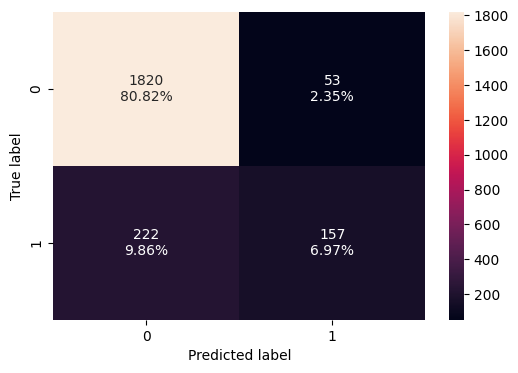

In [141]:
# creating confusion matrix
confusion_matrix_sklearn(lr, X_val, y_val)

* Logistic Regression has given a generalized performance on training and validation set.
* Recall is very low, we can try oversampling (increase training data) to see if the model performance can be improved.

**Let's evaluate the model performance by using KFold and cross_val_score**

In [142]:
scoring = "recall"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_bfr = cross_val_score(
    estimator=lr, X=X_train, y=y_train, scoring=scoring, cv=kfold
)
cv_result_bfr

array([0.36403509, 0.33920705, 0.40969163, 0.35964912, 0.39035088])

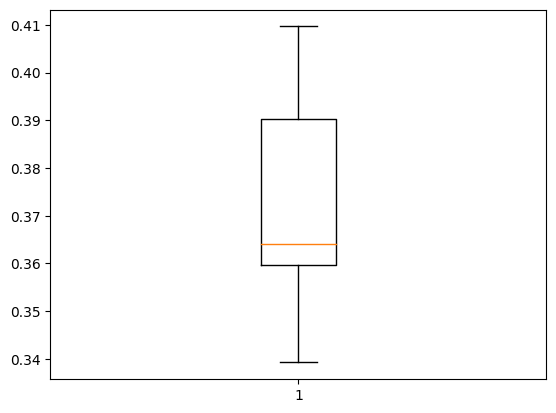

In [143]:
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

* Performance on training set using the cross-validation varies between ~0.33 to ~0.41 recall


### Model Building with Oversampled Data

In [146]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 1138
Before Oversampling, counts of label 'No': 5618 

After Oversampling, counts of label 'Yes': 5618
After Oversampling, counts of label 'No': 5618 

After Oversampling, the shape of train_X: (11236, 24)
After Oversampling, the shape of train_y: (11236,) 



In [147]:
log_reg_over = LogisticRegression(random_state=1)

# Training the basic logistic regression model with training set
log_reg_over.fit(X_train_over, y_train_over)

LogisticRegression(random_state=1)

In [148]:
# Calculating different metrics on train set
log_reg_over_train_perf = model_performance_classification_sklearn(
    log_reg_over, X_train_over, y_train_over
)
print("Training performance:")
log_reg_over_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.820,0.832,0.812,0.822


In [149]:
# Calculating different metrics on validation set
log_reg_over_val_perf = model_performance_classification_sklearn(
    log_reg_over, X_val, y_val
)
print("validation performance:")
log_reg_over_val_perf

validation performance:


,Accuracy,Recall,Precision,F1
0,0.786,0.697,0.418,0.523


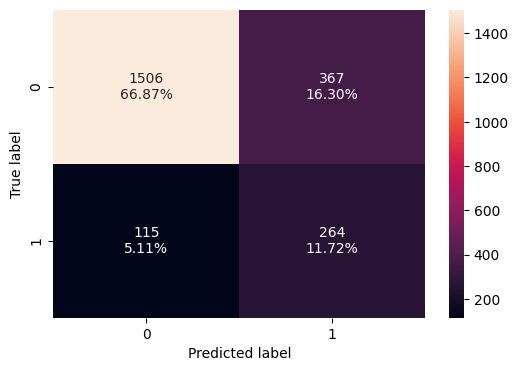

In [150]:
# creating confusion matrix
confusion_matrix_sklearn(log_reg_over, X_val, y_val)

**Let's evaluate the model performance by using KFold and cross_val_score**

In [151]:
scoring = "recall"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_over = cross_val_score(
    estimator=log_reg_over, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
)
cv_result_over

array([0.82918149, 0.83526269, 0.83259127, 0.84163701, 0.81939502])

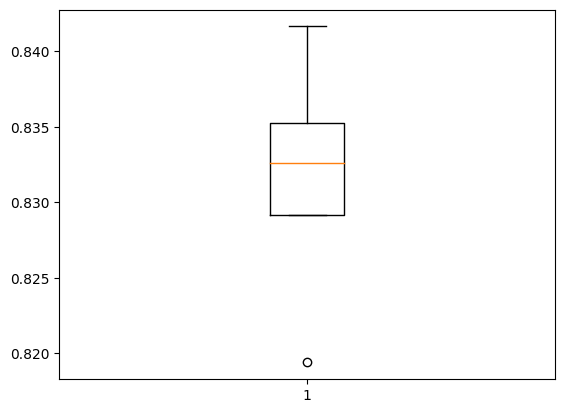

In [152]:
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_over)
plt.show()

* Performance of model on training set varies between 0.82 to 0.845, which is an improvement from the model built on the original dataset.
* Performance on the training set improved but the model is not able to replicate the same for the validation set, which indicates that the model is overfitting
* Lets try regularization to see if overfitting can be reduced

### Regularization

In [153]:
# Choose the type of classifier.
lr_estimator = LogisticRegression(random_state=1, solver="saga")

# Grid of parameters to choose from
parameters = {"C": np.arange(0.1, 1.1, 0.1)}

# Run the grid search
grid_obj = GridSearchCV(lr_estimator, parameters, scoring="recall")
grid_obj = grid_obj.fit(X_train_over, y_train_over)

# Set the clf to the best combination of parameters
lr_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
lr_estimator.fit(X_train_over, y_train_over)

LogisticRegression(C=0.1, random_state=1, solver='saga')

In [154]:
# Calculating different metrics on train set
log_reg_reg_train_perf = model_performance_classification_sklearn(
    lr_estimator, X_train_over, y_train_over
)
print("Training performance:")
log_reg_reg_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.755,0.824,0.724,0.771


In [155]:
# Calculating different metrics on validation set
log_reg_reg_val_perf = model_performance_classification_sklearn(
    lr_estimator, X_val, y_val
)
print("Validation performance:")
log_reg_reg_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.731,0.858,0.371,0.518


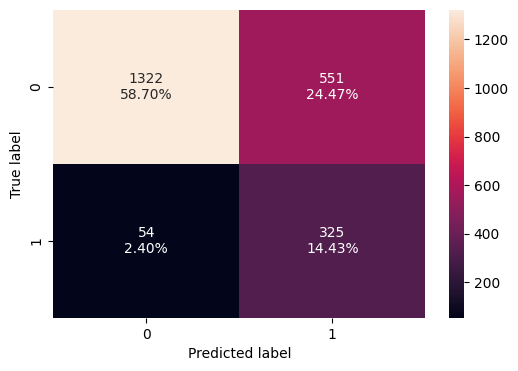

In [156]:
# creating confusion matrix
confusion_matrix_sklearn(lr_estimator, X_val, y_val)

* After regularization, overfitting has reduced to some extent and the model is also performing well

### Model Building with Undersampled Data

In [157]:
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)


print("Before UnderSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before UnderSampling, counts of label '0': {} \n".format(sum(y_train == 0)))


print("After UnderSampling, counts of label '1': {}".format(sum(y_train_un == 1)))
print("After UnderSampling, counts of label '0': {} \n".format(sum(y_train_un == 0)))


print("After UnderSampling, the shape of train_X: {}".format(X_train_un.shape))
print("After UnderSampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before UnderSampling, counts of label '1': 1138
Before UnderSampling, counts of label '0': 5618 

After UnderSampling, counts of label '1': 1138
After UnderSampling, counts of label '0': 1138 

After UnderSampling, the shape of train_X: (2276, 24)
After UnderSampling, the shape of train_y: (2276,) 



In [158]:
log_reg_under = LogisticRegression(random_state=1)
log_reg_under.fit(X_train_un, y_train_un)

LogisticRegression(random_state=1)

In [159]:
# Calculating different metrics on train set
log_reg_under_train_perf = model_performance_classification_sklearn(
    log_reg_under, X_train_un, y_train_un
)
print("Training performance:")
log_reg_under_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.773,0.794,0.762,0.778


In [160]:
# Calculating different metrics on validation set
log_reg_under_val_perf = model_performance_classification_sklearn(
    log_reg_under, X_val, y_val
)
print("Validation performance:")
log_reg_under_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.756,0.789,0.389,0.521


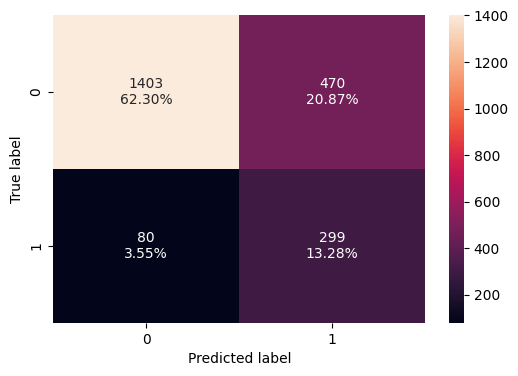

In [161]:
# creating confusion matrix
confusion_matrix_sklearn(log_reg_under, X_val, y_val)

* Model has given a generalized performance on training and validation set

**Let's evaluate the model performance by using KFold and cross_val_score**

In [162]:
scoring = "recall"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_under = cross_val_score(
    estimator=log_reg_under, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
)
cv_result_under

array([0.74122807, 0.79735683, 0.84140969, 0.79385965, 0.75      ])

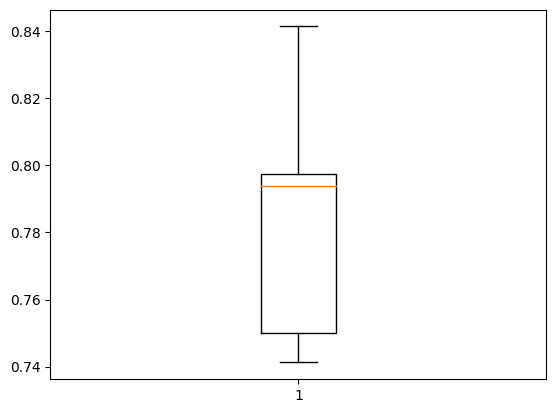

In [163]:
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_under)
plt.show()

* Performance of model on training set varies between 0.74 to 0.845, which is an improvement from the initial model (without oversampling)

## Model Performance comparison

In [164]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_over_train_perf.T,
        log_reg_reg_train_perf.T,
        log_reg_under_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression",
    "Logistic Regression with oversampled data",
    "Regularised Logistic Regression",
    "Logistic Regression with undersampled data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression,Logistic Regression with oversampled data,Regularised Logistic Regression,Logistic Regression with undersampled data
Accuracy,0.877,0.820,0.755,0.773
Recall,0.407,0.832,0.824,0.794
Precision,0.748,0.812,0.724,0.762
F1,0.527,0.822,0.771,0.778


In [165]:
# Validation performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_val_perf.T,
        log_reg_over_val_perf.T,
        log_reg_reg_val_perf.T,
        log_reg_under_val_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression",
    "Logistic Regression with oversampled data",
    "Regularised Logistic Regression",
    "Logistic Regression with undersampled data",
]
print("Validation performance comparison:")
models_train_comp_df

Validation performance comparison:


,Logistic Regression,Logistic Regression with oversampled data,Regularised Logistic Regression,Logistic Regression with undersampled data
Accuracy,0.878,0.786,0.731,0.756
Recall,0.414,0.697,0.858,0.789
Precision,0.748,0.418,0.371,0.389
F1,0.533,0.523,0.518,0.521


**We will proceed with the undersampled data, as Logistic Regression model gave the best Recall performance on it.**

## Bagging and Boosting

**Let's start by building different models using KFold and cross_val_score with pipelines and tune the best model using GridSearchCV and RandomizedSearchCV**

In [167]:
scorer = metrics.make_scorer(metrics.recall_score)

In [169]:
%%time 


models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring = scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

Bagging: 0.8725906175129452
Random forest: 0.927958111136873
GBM: 0.8603099157585593
Adaboost: 0.8295386042198005
Xgboost: 0.9217713888244841
dtree: 0.8637568591081226

Validation Performance:

Bagging: 0.8918205804749341
Random forest: 0.9366754617414248
GBM: 0.8707124010554089
Adaboost: 0.8364116094986808
Xgboost: 0.9261213720316622
dtree: 0.8680738786279684
CPU times: user 13.4 s, sys: 73.2 ms, total: 13.5 s
Wall time: 11.8 s


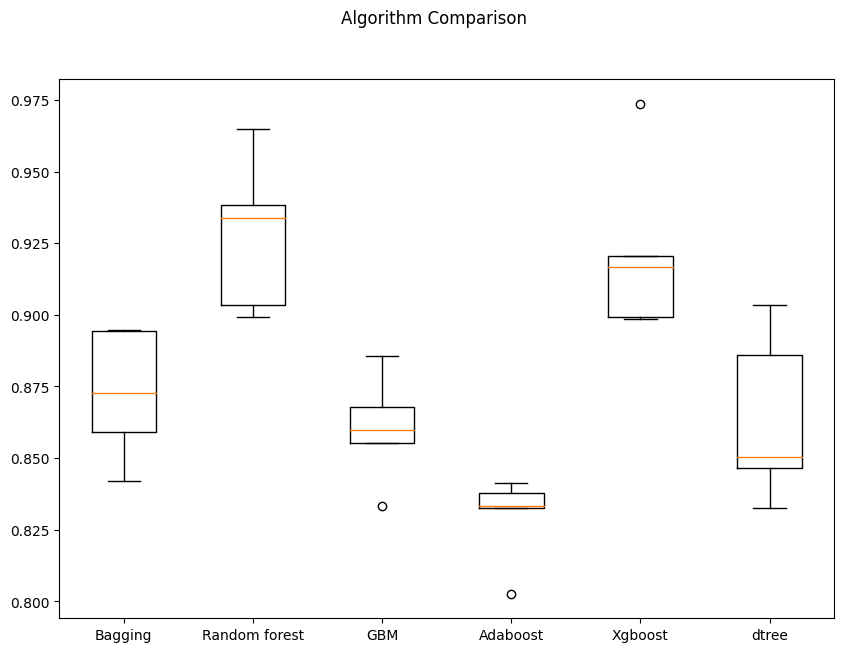

In [171]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

- We can see that Random Forest is giving the highest cross-validated recall followed by XGBoost and Bagging

- We will tune the Random Forest, XGBoost, and Bagging models and see if the performance improves.

## Hyperparameter Tuning

**We will tune Random Forest, XGBoost, and Bagging models using RandomizedSearchCV. We will also compare the performance and time taken by the two hyperparameter tuning methods - grid search and randomized search.**

### Random Forest

In [172]:
%%time 

# defining model
model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomizedSearchCV

param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 100, 'max_leaf_nodes': 9, 'max_features': 'log2', 'max_depth': 6} with CV score=0.8171612953087566:
CPU times: user 1min 4s, sys: 203 ms, total: 1min 5s
Wall time: 1min 5s


In [177]:
# building model with best parameters
rf_tuned = RandomForestClassifier(
    n_estimators=100,
    max_leaf_nodes=9,
    max_features='log2',
    max_depth=6
)

# Fit the model on training data
rf_tuned.fit(X_train_un, y_train_un)

RandomForestClassifier(max_depth=6, max_features='log2', max_leaf_nodes=9)

In [178]:
# Calculating different metrics on train set
rf_random_train = model_performance_classification_sklearn(
    rf_tuned, X_train_un, y_train_un
)
print("Training performance:")
rf_random_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.837,0.840,0.834,0.837


In [179]:
# Calculating different metrics on validation set
rf_random_val = model_performance_classification_sklearn(rf_tuned, X_val, y_val)
print("Validation performance:")
rf_random_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.843,0.844,0.521,0.645


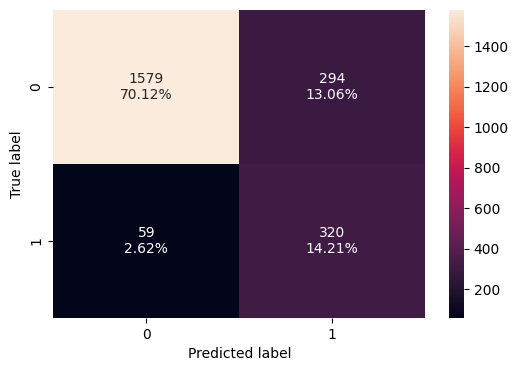

In [180]:
# creating confusion matrix
confusion_matrix_sklearn(rf_tuned, X_val, y_val)

- Random Forest returned strong Recall scores using RandomizedSearchCV on the Undersampled Data

### XGBoost

In [181]:
%%time 

# defining model
model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':np.arange(50,300,50),
            'scale_pos_weight':[0,1,2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05], 
            'gamma':[0,1,3,5],
            'subsample':[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 10, 'n_estimators': 200, 'learning_rate': 0.01, 'gamma': 1} with CV score=0.9754038179148312:
CPU times: user 3.19 s, sys: 331 ms, total: 3.52 s
Wall time: 1min 51s


In [182]:
# building model with best parameters
xgb_tuned = XGBClassifier(
    random_state=1,
    n_estimators=200,
    scale_pos_weight=10,
    learning_rate=0.01,
    gamma=1,
    subsample=0.9,
    eval_metric='logloss',
)

# Fit the model on training data
xgb_tuned.fit(X_train_un, y_train_un)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=1, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=1, ...)

In [183]:
# Calculating different metrics on train set
xgb_random_train = model_performance_classification_sklearn(
    xgb_tuned, X_train_un, y_train_un
)
print("Training performance:")
xgb_random_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.796,1.000,0.710,0.831


In [184]:
# Calculating different metrics on validation set
xgb_random_val = model_performance_classification_sklearn(xgb_tuned, X_val, y_val)
print("Validation performance:")
xgb_random_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.631,0.984,0.311,0.473


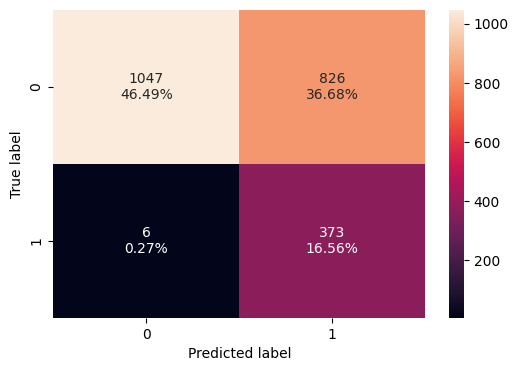

In [185]:
# creating confusion matrix
confusion_matrix_sklearn(xgb_tuned, X_val, y_val)

- XGBoost is overfitting the training data, but giving excellent Recall performance on the validation data.
- Accuracy, Precision, and F1 Score are all underperforming.

### Bagging

In [186]:
%%time

# defining model
model = BaggingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
              'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 40, 'max_samples': 1, 'max_features': 0.9} with CV score=1.0:
CPU times: user 935 ms, sys: 132 ms, total: 1.07 s
Wall time: 33 s


In [187]:
# building model with best parameters
bagging_tuned = BaggingClassifier(
    max_features=0.9,
    random_state=1,
    max_samples=1,
    n_estimators=40
)

# Fit the model on training data
bagging_tuned.fit(X_train_un, y_train_un)

BaggingClassifier(max_features=0.9, max_samples=1, n_estimators=40,
                  random_state=1)

In [188]:
# Calculating different metrics on train set
bagging_random_train = model_performance_classification_sklearn(
    bagging_tuned, X_train_un, y_train_un
)
print("Training performance:")
bagging_random_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.500,1.000,0.500,0.667


In [189]:
# Calculating different metrics on validation set
bagging_random_val = model_performance_classification_sklearn(bagging_tuned, X_val, y_val)
print("Validation performance:")
bagging_random_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.168,1.000,0.168,0.288


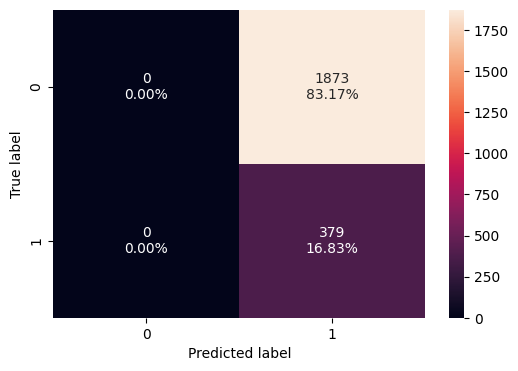

In [190]:
# creating confusion matrix
confusion_matrix_sklearn(bagging_tuned, X_val, y_val)

- Bagging is overfitting the training data, but scoring 100% on Recall.
- Accuracy, Precision, and F1 Score are all very low.

## Model Performance Comparison and Final Model Selection

In [191]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        rf_random_train.T,
        xgb_random_train.T,
        bagging_random_train.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Random Forest Tuned with Random search",
    "XGBoost Tuned with Random search",
    "Bagging with random search",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Random Forest Tuned with Random search,XGBoost Tuned with Random search,Bagging with random search
Accuracy,0.837,0.796,0.500
Recall,0.840,1.000,1.000
Precision,0.834,0.710,0.500
F1,0.837,0.831,0.667


In [192]:
# Validation performance comparison

models_val_comp_df = pd.concat(
    [
        rf_random_val.T,
        xgb_random_val.T,
        bagging_random_val.T
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Random Forest Tuned with Random search",
    "XGBoost Tuned with Random search",
    "Bagging with random search",
]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,Random Forest Tuned with Random search,XGBoost Tuned with Random search,Bagging with random search
Accuracy,0.843,0.631,0.168
Recall,0.844,0.984,1.000
Precision,0.521,0.311,0.168
F1,0.645,0.473,0.288


- The Random Forest model tuned using Random search is giving the best overall scores, with strong Recall (.84).
- Let's check the model's performance on the test set and then see the feature importance from the tuned Random Forest model.

In [193]:
# Calculating different metrics on the test set
rf_random_test = model_performance_classification_sklearn(rf_tuned, X_test, y_test)
print("Test performance:")
rf_random_test

Test performance:


,Accuracy,Recall,Precision,F1
0,0.834,0.805,0.504,0.620


- The performance on test data is similar to performance on validation data.
- Let's check the important features for prediction as per the the final model.

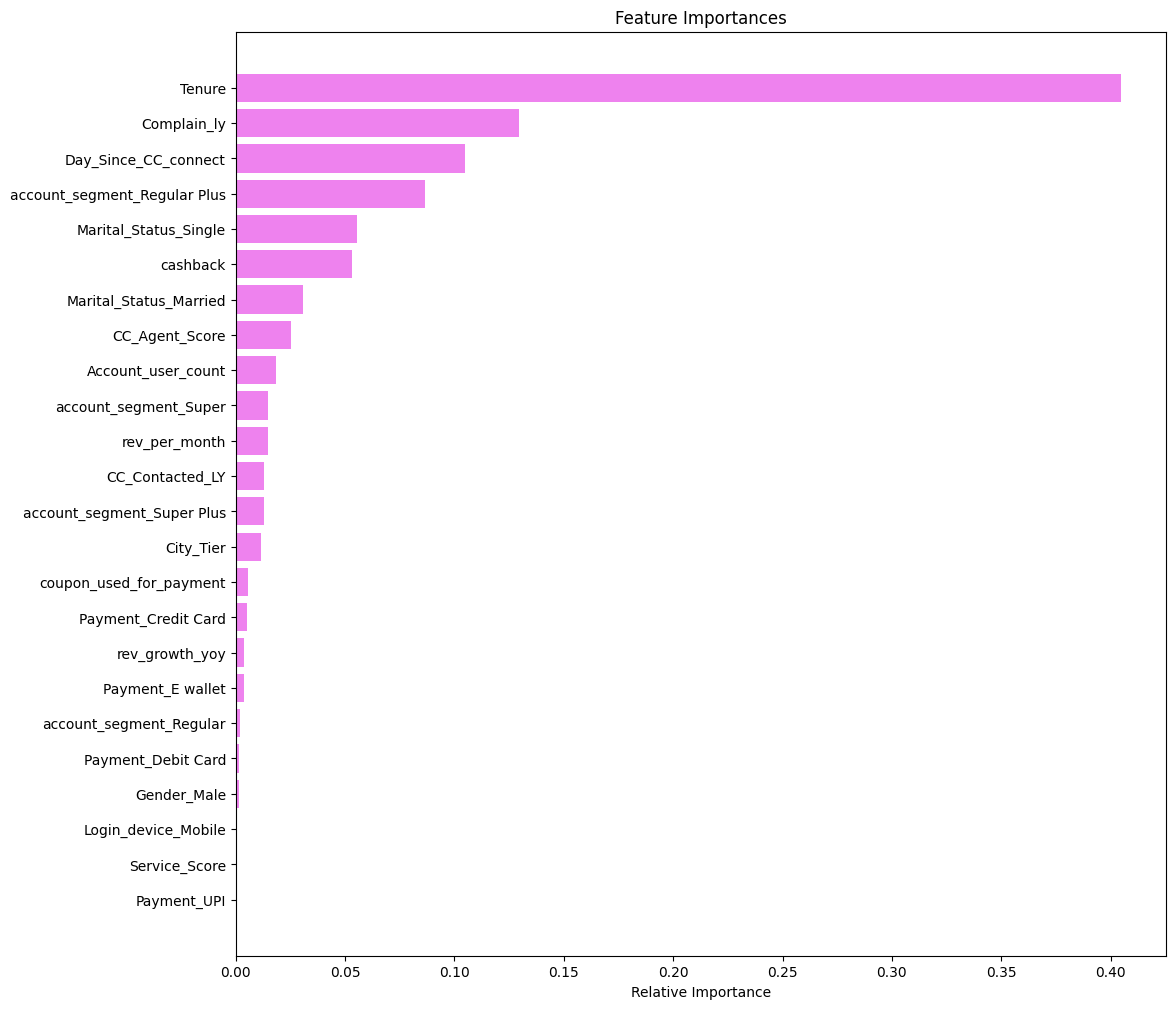

In [202]:
feature_names = X_train_un.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- Tenure is the most important feature, followed by if the account issued a complaint in the last year, number of days since the account contacted support, and if the account is a Regular Plus account.

## Pipelines

We will create 2 different pipelines, one for numerical columns and one for categorical columns
- For numerical columns, we will do missing value imputation as pre-processing
- For categorical columns, we will do one hot encoding and missing value imputation as pre-processing

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11158 non-null  float64
 2   City_Tier                11148 non-null  float64
 3   CC_Contacted_LY          11158 non-null  float64
 4   Payment                  11151 non-null  float64
 5   Gender                   11152 non-null  float64
 6   Service_Score            11162 non-null  float64
 7   Account_user_count       11148 non-null  float64
 8   account_segment          11163 non-null  float64
 9   CC_Agent_Score           11144 non-null  float64
 10  Marital_Status           11048 non-null  float64
 11  rev_per_month            10469 non-null  float64
 12  Complain_ly              10903 non-null  float64
 13  rev_growth_yoy           11260 non-null  int64  
 14  coupon_used_for_paymen

In [209]:
# creating a list of numerical variables
numerical_features = [
    "Tenure",
    "City_Tier",
    "CC_Contacted_LY",
    "Service_Score",
    "Account_user_count",
    "CC_Agent_Score",
    "rev_per_month",
    "Complain_ly",
    "rev_growth_yoy",
    "coupon_used_for_payment",
    "Day_Since_CC_connect",
    "cashback",
]

# creating a transformer for numerical variables, which will apply simple imputer on the numerical variables
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median"))])


# creating a list of categorical variables
categorical_features = ["Payment", "Gender", "account_segment", "Marital_Status", "Login_device"]

# creating a transformer for categorical variables, which will first apply simple imputer and 
#then do one hot encoding for categorical variables
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)
# handle_unknown = "ignore", allows model to handle any unknown category in the test data

# combining categorical transformer and numerical transformer using a column transformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder="passthrough",
)
# remainder = "passthrough" has been used, it will allow variables that are present in original data 
# but not in "numerical_columns" and "categorical_columns" to pass through the column transformer without any changes


In [210]:
# Separating target variable and other variables
X = df.drop(columns="Churn")
Y = df["Churn"]

- Now we already know the best model we need to process with, so we don't need to divide data into 3 parts

In [211]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.20, random_state=1, stratify=Y
)
print(X_train.shape, X_test.shape)

(9008, 17) (2252, 17)


In [212]:
# Creating new pipeline with best parameters
model = Pipeline(
    steps=[
        ("pre", preprocessor),
        (
            "Random Forest",
            RandomForestClassifier(
            n_estimators=100,
            max_leaf_nodes=9,
            max_features='log2',
            max_depth=6
        ),
        ),
    ]
)
# Fit the model on training data
model.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Tenure', 'City_Tier',
                                                   'CC_Contacted_LY',
                                                   'Service_Score',
                                                   'Account_user_count',
                                                   'CC_Agent_Score',
                                                   'rev_per_month',
                                                   'Complain_ly',
                                                   'rev_growth_yoy',
                                                   'coupon_used_for_payment',
                                                   'Day_Since_CC_connect',
                                                   'cashback']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Payment', 'Gender',
                                                   'account_segment',
                                                   'Marital_Status',
                                                   'Login_device'])])),
                ('Random Forest',
                 RandomForestClassifier(max_depth=6, max_features='log2',
                                        max_leaf_nodes=9))])

## Business Insights and Recommendations

- The following accounts are most likely to churn, and should be targeted with offers:
  - Accounts that were set up within the past 12 months.
  - Accounts that issued at least one complaint within the past 12 months.
  - Accounts that have contacted Customer Care within the past 3 months.
  - Regular Plus accounts.

In [214]:
%%shell
jupyter nbconvert --to html /content/Code.ipynb

[NbConvertApp] Converting notebook /content/Code.ipynb to html
[NbConvertApp] Writing 6848757 bytes to /content/Code.html
